Tugas Praktikum ML Lab B1

Pertemuan 3

Nama : Sherli Arninda

NIM : 24060122120028

Nama Dataset : Zoo

Link : https://archive.ics.uci.edu/dataset/111/zoo

# **1. Lakukan agglomerative clustering untuk dataset random yang tersedia di atas dengan single linkage dan average linkage! Jelaskan perbedaannya!**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import Library yang dibutuhkan
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

# Import Library yang dibutuhkan untuk proses Agglomerative Clustering
import scipy
from scipy import ndimage
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix

from sklearn import manifold, datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs

In [5]:
# Generate Random Data
X1, y1 = make_blobs(n_samples=50, centers=[[4,4], [-2,-1], [1,1], [10,4]], cluster_std=0.9)
# Menampilkan dimensi generate data
X1.shape

(50, 2)

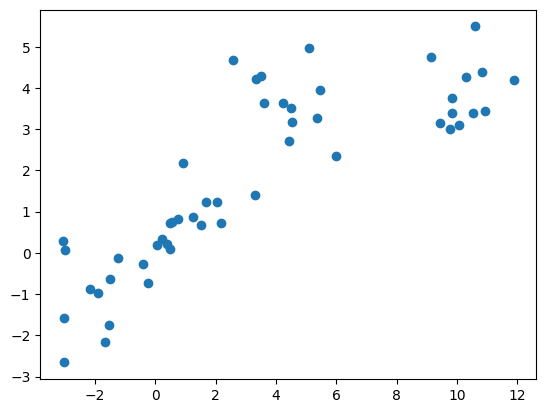

In [6]:
# Plotting Random Data, menghasilkan output yang membagi data menjadi beberapa kelompok
plt.scatter(X1[:, 0], X1[:, 1], marker='o')

In [9]:
# Algomerative clustering, akan membutuhkan dua masukan yaitu n_clusters dan linkage
# Inisialisasi objek AgglomerativeClustering
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'single')
# Melatih model pengelompokan pada dataset
agglom.fit(X1,y1)

AgglomerativeClustering(linkage='single', n_clusters=4)

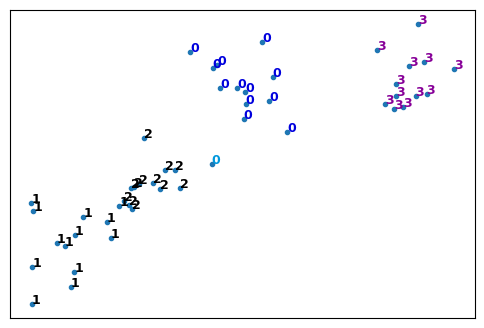

In [10]:
# Membuat figure dengan ukuran 6, 4
plt.figure(figsize=(6,4))

# Membuat minimum dan maximum range dari X1.
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

# Mencari rata-rata dari jarak X1.
X1 = (X1 - x_min) / (x_max - x_min)

# Looping untuk mendisplay semua datapoints.
for i in range(X1.shape[0]) :
  plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
    color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
    fontdict={'weight' : 'bold', 'size' : 9})

# Hapus x ticks, y ticks, x dan y axis (garis koordinat)
plt.xticks([])
plt.yticks([])

# Menampilkan plot dari data asli sebelum dicluster
plt.scatter(X1[:, 0], X1[:, 1], marker='.')
# Menampilkan plot
plt.show()

In [12]:
# Plotting dendogram (mencari jarak), digunakan untuk menentukan jarak antara titik ke titik lain
# dari sebuah dataset random (X1) yang sudah diinisialisasi
# Menghitung matriks jarak antara dua set data
dist_matrix = distance_matrix(X1,X1)

# Mencetak hasil matriks jarak
print(dist_matrix)

[[0.         0.11463702 0.73860193 ... 0.38721165 0.45393713 0.35387938]
 [0.11463702 0.         0.70030941 ... 0.32576061 0.39832269 0.27192753]
 [0.73860193 0.70030941 0.         ... 0.38213435 1.0457537  0.46118151]
 ...
 [0.38721165 0.32576061 0.38213435 ... 0.         0.66644728 0.08817681]
 [0.45393713 0.39832269 1.0457537  ... 0.66644728 0.         0.58457861]
 [0.35387938 0.27192753 0.46118151 ... 0.08817681 0.58457861 0.        ]]


In [13]:
# Memberikan parameter pada kelas linkage dari hierarki
X = hierarchy.linkage(dist_matrix, 'single')
Y = hierarchy.linkage(dist_matrix, 'average')

<ipython-input-13-c1e7a0c0e662>:2: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  X = hierarchy.linkage(dist_matrix, 'single')
<ipython-input-13-c1e7a0c0e662>:3: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Y = hierarchy.linkage(dist_matrix, 'average')


Text(0.5, 1.0, 'Single Linkage')

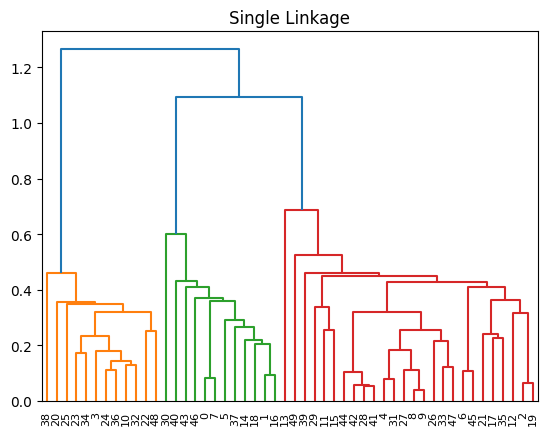

In [14]:
# Single Linkage
dendroX = hierarchy.dendrogram(X)
plt.title("Single Linkage")

Text(0.5, 1.0, 'Average Linkage')

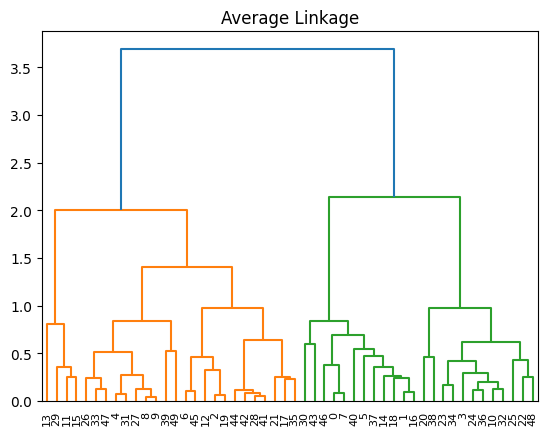

In [15]:
# Average Linkage
dendroY = hierarchy.dendrogram(Y)
plt.title("Average Linkage")

**Perbedaan Single Linkage dan Average Linkage**
****

**1.   Single Linkage:**
*   Cenderung membentuk kluster yang panjang dan  sempit.
*   Sensitif terhadap outlier karena hanya mempertimbangkan jarak minimum.
*   Cocok untuk mendeteksi pola rantai dalam data.

**2.   Average Linkage:**
*   Kluster yang terbentuk lebih seimbang.
*   Kurang sensitif terhadap outlier dibandingkan single linkage.
*   Cocok untuk mendeteksi struktur kluster secara keseluruhan.







# **2. Lakukan agglomerative clustering menggunakan scipy dan scikit-learn dengan single linkage dan average linkage untuk dataset cars_clustering! Jelaskan perbedaannya!**

In [22]:
# Membaca dataset dengan library panda
pdf = pd.read_csv("cars_clus.csv")

In [23]:
# Menampilkan dimensi dataset
pdf.shape

(159, 16)

In [24]:
# Menampilkan 10 data teratas
pdf.head(10)

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.36,0,21.5,1.8,140,101.2,67.3,172.4,2.639,13.2,28,2.828,0
1,Acura,TL,39.384,19.875,0,28.4,3.2,225,108.1,70.3,192.9,3.517,17.2,25,3.673,0
2,Acura,CL,14.114,18.225,0,$null$,3.2,225,106.9,70.6,192,3.47,17.2,26,2.647,0
3,Acura,RL,8.588,29.725,0,42,3.5,210,114.6,71.4,196.6,3.85,18,22,2.15,0
4,Audi,A4,20.397,22.255,0,23.99,1.8,150,102.6,68.2,178,2.998,16.4,27,3.015,0
5,Audi,A6,18.78,23.555,0,33.95,2.8,200,108.7,76.1,192,3.561,18.5,22,2.933,0
6,Audi,A8,1.38,39,0,62,4.2,310,113,74,198.2,3.902,23.7,21,0.322,0
7,BMW,323i,19.747,$null$,0,26.99,2.5,170,107.3,68.4,176,3.179,16.6,26.1,2.983,0
8,BMW,328i,9.231,28.675,0,33.4,2.8,193,107.3,68.5,176,3.197,16.6,24,2.223,0
9,BMW,528i,17.527,36.125,0,38.9,2.8,193,111.4,70.9,188,3.472,18.5,24.8,2.864,0


In [25]:
# Mencetak dimensi dataset sebelum proses pembersihan
print("Dimensi dataset sebelum cleaning:", pdf.size)

# Mengubah kolom tertentu menjadi tipe data numerik, dan mengatasi nilai non-numerik dengan menggantinya menjadi NaN
pdf[['sales', 'resale', 'type','price','engine_s','horsepow','wheelbas','width',
      'length','curb_wgt','fuel_cap','mpg', 'lnsales']] = pdf[['sales', 'resale',
      'type','price','engine_s','horsepow','wheelbas','width','length','curb_wgt',
      'fuel_cap','mpg', 'lnsales']].apply(pd.to_numeric, errors='coerce')

# Menghapus baris yang mengandung nilai NaN
pdf = pdf.dropna()
# Mengatur ulang indeks setelah penghapusan baris
pdf = pdf.reset_index(drop=True)
# Mencetak dimensi dataset setelah proses pembersihan
print("Ukuran pdf setelah cleaning:", pdf.size)
# Menampilkan 10 baris pertama dari dataset yang telah dibersihkan
pdf.head(10)

Dimensi dataset sebelum cleaning: 2544
Ukuran pdf setelah cleaning: 1872


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.0,21.500,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0
1,Acura,TL,39.384,19.875,0.0,28.400,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0
2,Acura,RL,8.588,29.725,0.0,42.000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0
3,Audi,A4,20.397,22.255,0.0,23.990,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0
4,Audi,A6,18.780,23.555,0.0,33.950,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0
5,Audi,A8,1.380,39.000,0.0,62.000,4.2,310.0,113.0,74.0,198.2,3.902,23.7,21.0,0.322,0
6,BMW,328i,9.231,28.675,0.0,33.400,2.8,193.0,107.3,68.5,176.0,3.197,16.6,24.0,2.223,0
7,BMW,528i,17.527,36.125,0.0,38.900,2.8,193.0,111.4,70.9,188.0,3.472,18.5,24.8,2.864,0
8,Buick,Century,91.561,12.475,0.0,21.975,3.1,175.0,109.0,72.7,194.6,3.368,17.5,25.0,4.517,0
9,Buick,Regal,39.350,13.740,0.0,25.300,3.8,240.0,109.0,72.7,196.2,3.543,17.5,23.0,3.672,0


In [26]:
# Feature Selection
featureset = pdf[['engine_s', 'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']]
featureset.head()

,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg
0,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0
1,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0
2,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0
3,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0
4,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0


In [27]:
# NORMALIZATION
from sklearn.preprocessing import MinMaxScaler

# x berisikan nilai dari featureset yang nantinya akan digunakan untuk normalisasi
x = featureset.values

# Membuat objek MinMaxScaler
min_max_scaler = MinMaxScaler()

# Menggunakan fit_transform untuk mengubah nilai variabel dalam rentang 0 hingga 1
feature_mtx = min_max_scaler.fit_transform(x)

# Menampilkan lima baris pertama dari hasil normalisasi
feature_mtx[0:5]

array([[0.11428571, 0.21518987, 0.18655098, 0.28143713, 0.30625832,
        0.2310559 , 0.13364055, 0.43333333],
       [0.31428571, 0.43037975, 0.3362256 , 0.46107784, 0.5792277 ,
        0.50372671, 0.31797235, 0.33333333],
       [0.35714286, 0.39240506, 0.47722343, 0.52694611, 0.62849534,
        0.60714286, 0.35483871, 0.23333333],
       [0.11428571, 0.24050633, 0.21691974, 0.33532934, 0.38082557,
        0.34254658, 0.28110599, 0.4       ],
       [0.25714286, 0.36708861, 0.34924078, 0.80838323, 0.56724368,
        0.5173913 , 0.37788018, 0.23333333]])

In [29]:
# A. Agglomerative Clustering with Scipy, digunakan untuk menghitung jarak antara cluster yang baru terbentuk
import numpy as np
import scipy
import pylab
import scipy.cluster.hierarchy

# Mendapatkan jumlah baris (leng) dalam feature_mtx
leng = feature_mtx.shape[0]

# Inisialisasi matriks jarak D dengan nol menggunakan numpy
D = np.zeros([leng, leng])

# Menghitung jarak euclidean antara setiap pasangan data dalam feature_mtx
for i in range(leng):
    for j in range(leng):
        D[i, j] = np.linalg.norm(feature_mtx[i] - feature_mtx[j])

In [30]:
X = hierarchy.linkage(D, 'single')
Y = hierarchy.linkage(D, 'average')

<ipython-input-30-79769beb0d6c>:1: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  X = hierarchy.linkage(D, 'single')
<ipython-input-30-79769beb0d6c>:2: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Y = hierarchy.linkage(D, 'average')


In [32]:
# SINGLE LINKAGE
# Menentukan jumlah cluster
from scipy.cluster.hierarchy import fcluster

# Mencetak informasi tentang metode linkage yang digunakan
print("Single Linkage")
# Menentukan batas jarak maksimum (max_d) untuk membentuk cluster
max_d = 3
# Menggunakan fungsi fcluster untuk menentukan cluster
clusters = fcluster(X, max_d, criterion='distance')
clusters

Single Linkage


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [33]:
# Menentukan jumlah cluster
from scipy.cluster.hierarchy import fcluster

# Mencetak informasi tentang metode linkage yang digunakan
print("Single Linkage")
# Menentukan jumlah klaster yang diinginkan (k)
k = 5
# Menggunakan fungsi fcluster untuk menentukan cluster
clusters = fcluster(X, k, criterion = 'maxclust')
clusters

Single Linkage


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       5, 2, 2, 2, 2, 2, 2, 2, 2, 4, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2], dtype=int32)

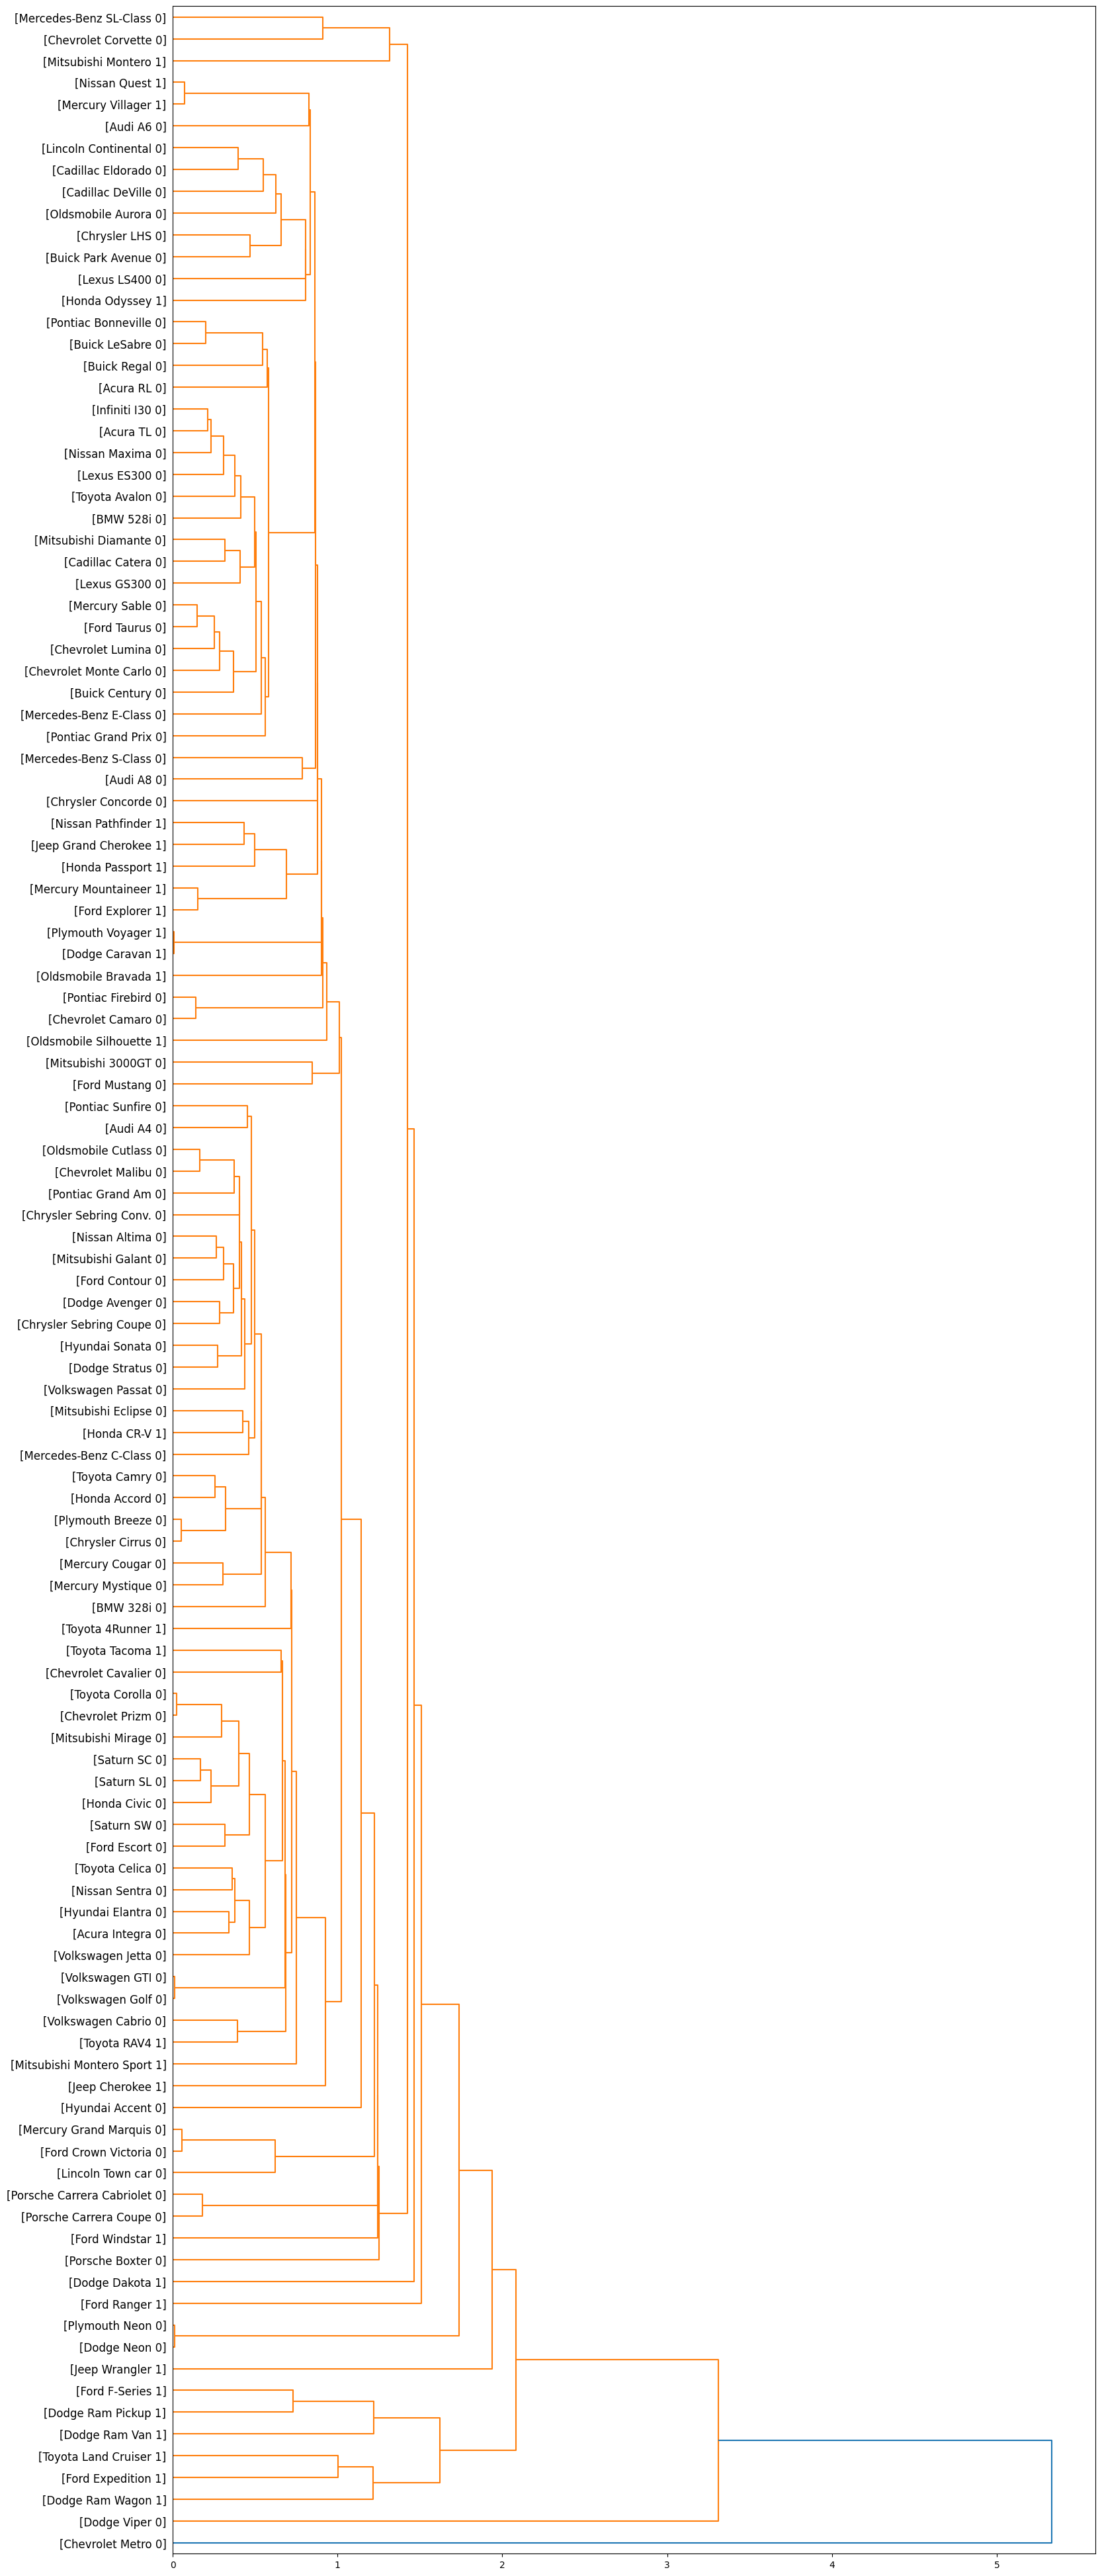

In [35]:
# Plotting Dendogram Single Linkage
# Menentukan ukuran figure yang akan dibuat
fig = pylab.figure(figsize=(18,50))

# Fungsi untuk memberikan label pada leaf (daun) dendrogram
def llf(id):
  return '[%s %s %s]' % (pdf['manufact'][id], pdf['model'][id],
                         int(float(pdf['type'][id])))

# Membuat dendrogram
dendro = hierarchy.dendrogram(X, leaf_label_func = llf,
                              leaf_rotation = 0, leaf_font_size = 12, orientation = 'right')

In [36]:
# AVERAGE LINKAGE
# Menentukan jumlah cluster
from scipy.cluster.hierarchy import fcluster

# Mencetak informasi tentang metode linkage yang digunakan
print("Average Linkage")
# Menentukan batas jarak maksimum (max_d) untuk membentuk cluster
max_d = 3
# Menggunakan fungsi fcluster untuk menentukan cluster
clusters = fcluster(Y, max_d, criterion='distance')
clusters

Average Linkage


array([3, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5, 5, 5, 4, 3,
       6, 5, 5, 5, 5, 5, 3, 5, 5, 2, 1, 1, 1, 4, 5, 3, 5, 5, 5, 4, 5, 4,
       1, 5, 1, 3, 5, 5, 5, 4, 3, 3, 5, 5, 3, 5, 5, 5, 5, 4, 4, 4, 3, 5,
       5, 5, 5, 4, 5, 5, 5, 5, 4, 5, 5, 5, 5, 4, 4, 3, 5, 5, 5, 5, 5, 4,
       5, 4, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 5, 5, 3, 5, 3,
       5, 1, 3, 5, 5, 3, 3], dtype=int32)

In [37]:
# Menentukan jumlah cluster
from scipy.cluster.hierarchy import fcluster

# Mencetak informasi tentang metode linkage yang digunakan
print("Average Linkage")
# Menentukan jumlah klaster yang diinginkan (k)
k = 5
# Menggunakan fungsi fcluster untuk menentukan cluster
clusters = fcluster(Y, k, criterion = 'maxclust')
clusters

Average Linkage


array([2, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 3, 3, 4, 4, 4, 4, 4, 4, 3, 2,
       5, 4, 4, 4, 4, 4, 2, 4, 4, 1, 1, 1, 1, 3, 4, 2, 4, 4, 4, 3, 4, 3,
       1, 4, 1, 2, 4, 4, 4, 3, 2, 2, 4, 4, 2, 4, 4, 4, 4, 3, 3, 3, 2, 4,
       4, 4, 4, 3, 4, 4, 4, 4, 3, 4, 4, 4, 4, 3, 3, 2, 4, 4, 4, 4, 4, 3,
       4, 3, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 4, 2, 4, 2,
       4, 1, 2, 4, 4, 2, 2], dtype=int32)

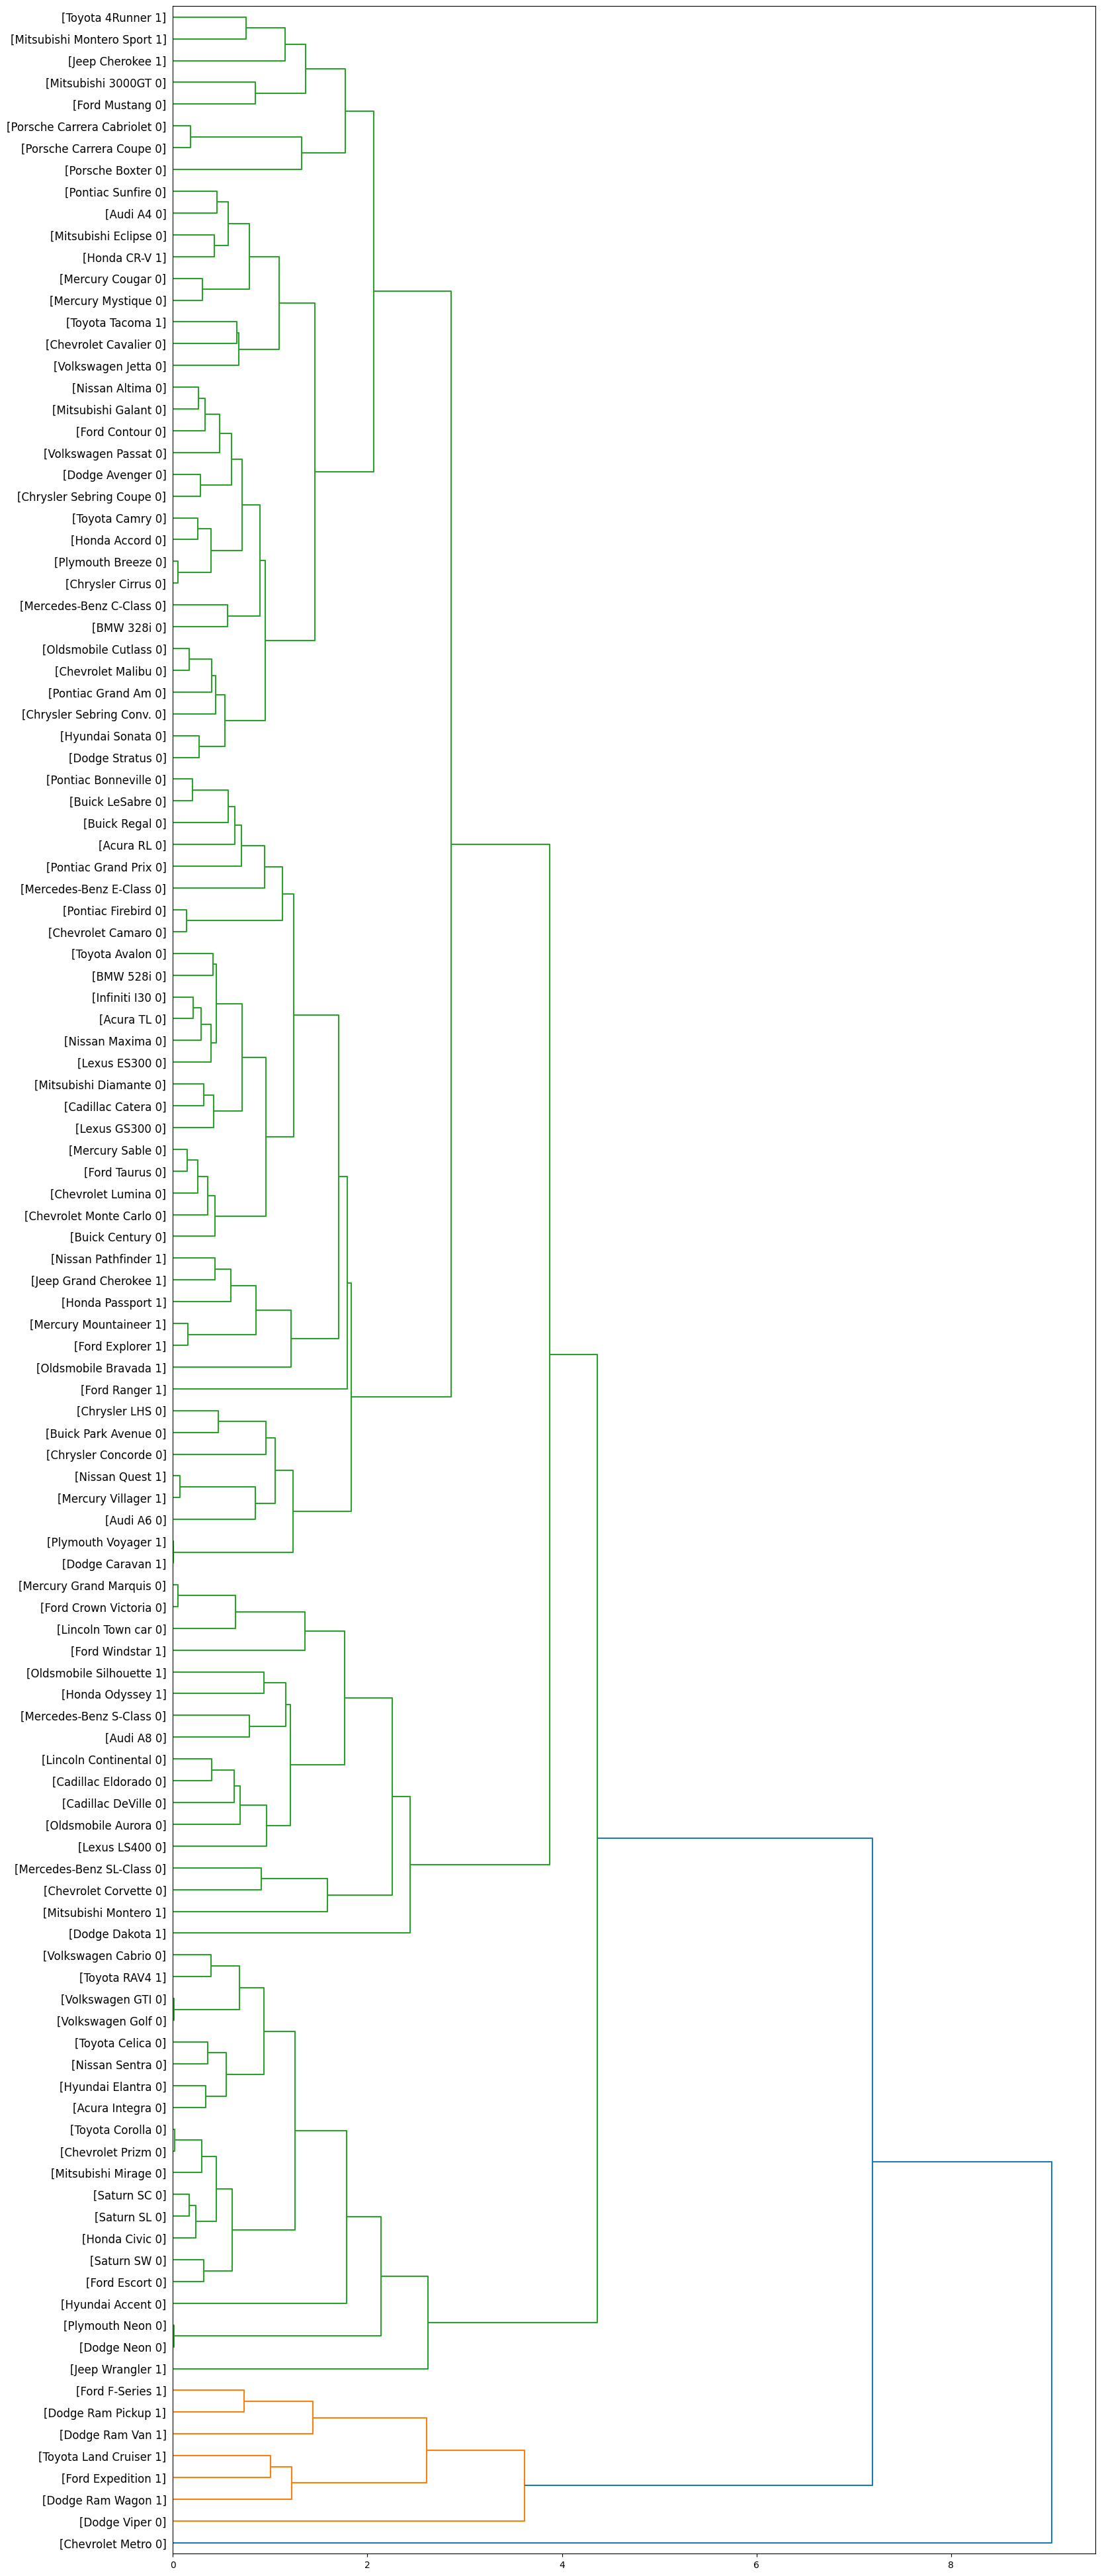

In [38]:
# Plotting Dendogram Average Linkage
# Menentukan ukuran figure yang akan dibuat
fig = pylab.figure(figsize=(18,50))

# Fungsi untuk memberikan label pada leaf (daun) dendrogram
def llf(id):
  return '[%s %s %s]' % (pdf['manufact'][id], pdf['model'][id],
                         int(float(pdf['type'][id])))

# Membuat dendrogram
dendro = hierarchy.dendrogram(Y, leaf_label_func = llf,
                              leaf_rotation = 0, leaf_font_size = 12, orientation = 'right')

In [40]:
# B. Agglomerative Clustering with Scikit Learn
# digunakan untuk mengelompokkan dataset dengan menggunakan pendekatan bottom-up.
# Mencari jarak matrix
dist_matrix = distance_matrix(feature_mtx, feature_mtx)

# Mencetak matriks jarak yang dihasilkan
print(dist_matrix)

[[0.         0.57777143 0.75455727 ... 0.28530295 0.24917241 0.18879995]
 [0.57777143 0.         0.22798938 ... 0.36087756 0.66346677 0.62201282]
 [0.75455727 0.22798938 0.         ... 0.51727787 0.81786095 0.77930119]
 ...
 [0.28530295 0.36087756 0.51727787 ... 0.         0.41797928 0.35720492]
 [0.24917241 0.66346677 0.81786095 ... 0.41797928 0.         0.15212198]
 [0.18879995 0.62201282 0.77930119 ... 0.35720492 0.15212198 0.        ]]


In [42]:
# Single Linkage
# Membuat objek dari kelas AgglomerativeClustering
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'single')

# Melakukan clustering
agglom.fit(feature_mtx)
agglom.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 5, 1, 4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0])

In [43]:
# Menambahkan kolom baru bernama 'cluster_' ke dalam DataFrame pdf
pdf['cluster_'] = agglom.labels_

# Menampilkan lima baris pertama
pdf.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,cluster_
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0,0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0,0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0,0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0,0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0,0


<ipython-input-44-f9c609d60041>:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)


Text(0, 0.5, 'mpg')

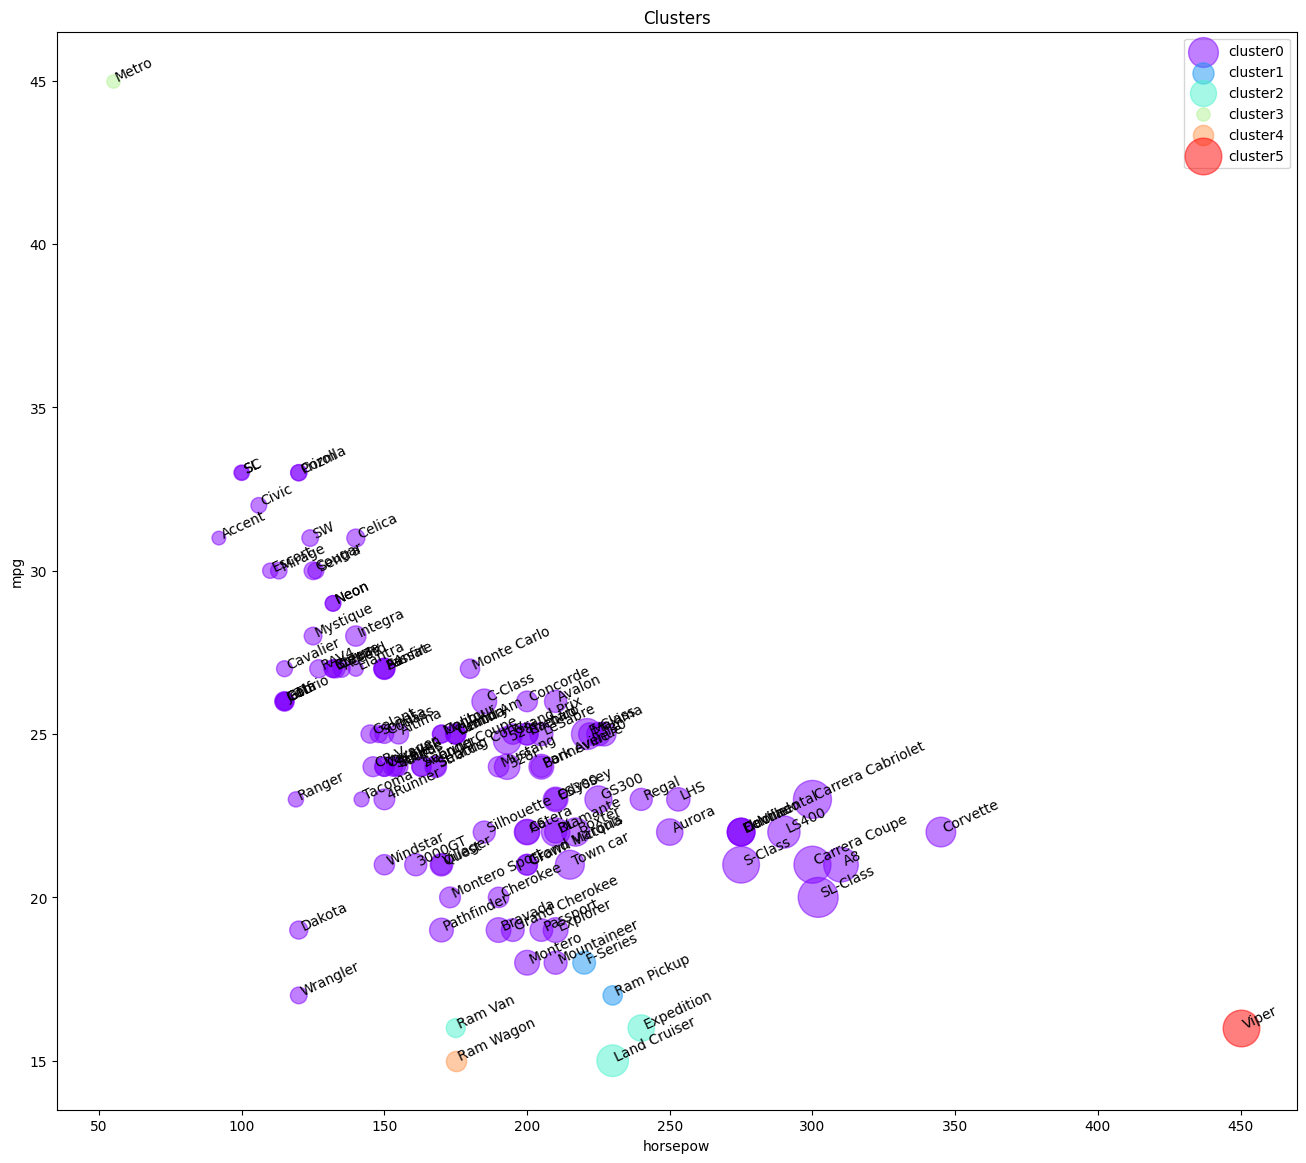

In [44]:
# Plotting dengan scatter plot
# Mengimpor modul colormap dari pustaka Matplotlib
import matplotlib.cm as cm

# Inisialisasi Warna dan Label Klaster
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
# Membuat daftar label klaster.
cluster_labels = list(range(0, n_clusters))

# Membuat gambar dengan ukuran 6x4 inch
plt.figure(figsize=(16,14))

# Visualisasi Setiap Klaster
for color, label in zip(colors, cluster_labels):
  subset = pdf[pdf.cluster_ == label]
  for i in subset.index:
          plt.text(subset.horsepow[i], subset.mpg[i],str(subset['model'][i]), rotation=25)
  plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)

# Penyusunan Legenda dan Label Grafik
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

In [45]:
# Menghitung tipe di setiap cluster
pdf.groupby(['cluster_', 'type'])['cluster_'].count()

cluster_  type
0         0.0     86
          1.0     23
1         1.0      2
2         1.0      3
3         0.0      1
4         1.0      1
5         0.0      1
Name: cluster_, dtype: int64

In [47]:
# Karakteristik masing-masing cluster
agg_cars = pdf.groupby(['cluster_', 'type'])[['horsepow', 'engine_s', 'mpg', 'price']].mean()
agg_cars

horsepow  engine_s        mpg      price
cluster_ type                                            
0        0.0   181.197674  2.902326  25.358140  26.286779
         1.0   167.478261  3.095652  21.000000  22.811261
1        1.0   225.000000  4.900000  17.500000  23.197500
2        1.0   215.000000  4.400000  15.666667  35.479333
3        0.0    55.000000  1.000000  45.000000   9.235000
4        1.0   175.000000  3.900000  15.000000  21.315000
5        0.0   450.000000  8.000000  16.000000  69.725000

<ipython-input-48-7c9d4e28bff0>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(subset.loc[i][0] + 5, subset.loc[i][2], 'type=' + str(int(i)) + ', price = ' + str(int(subset.loc[i][3])) + 'k')
<ipython-input-48-7c9d4e28bff0>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.mpg, s = subset.price*20, c = color, label = 'cluster' + str(label))


Text(0, 0.5, 'mpg')

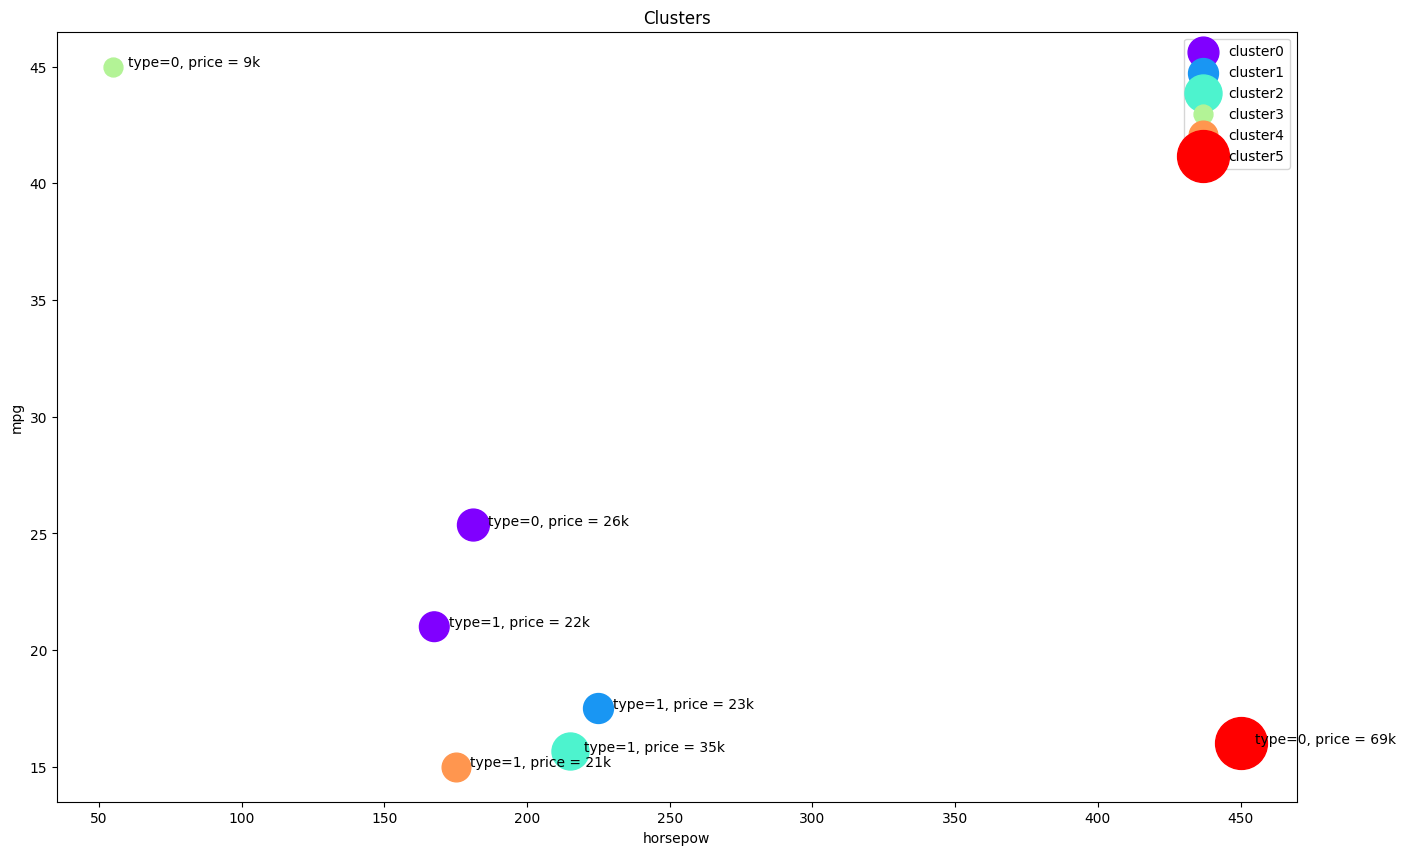

In [48]:
# Plotting dendogram single linkage
# Membuat objek gambar (figure) dengan ukuran 16x10.
plt.figure(figsize=(16, 10))

# Visualisasi Setiap Klaster
for color, label in zip(colors, cluster_labels):
  subset = agg_cars.loc[(label,),]
  for i in subset.index:
    plt.text(subset.loc[i][0] + 5, subset.loc[i][2], 'type=' + str(int(i)) + ', price = ' + str(int(subset.loc[i][3])) + 'k')
  plt.scatter(subset.horsepow, subset.mpg, s = subset.price*20, c = color, label = 'cluster' + str(label))

# Penyusunan Legenda dan Label Grafik
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

In [49]:
# Mencari jarak matrix
dist_matrix = distance_matrix(feature_mtx, feature_mtx)

# Mencetak matriks jarak yang dihasilkan
print(dist_matrix)

[[0.         0.57777143 0.75455727 ... 0.28530295 0.24917241 0.18879995]
 [0.57777143 0.         0.22798938 ... 0.36087756 0.66346677 0.62201282]
 [0.75455727 0.22798938 0.         ... 0.51727787 0.81786095 0.77930119]
 ...
 [0.28530295 0.36087756 0.51727787 ... 0.         0.41797928 0.35720492]
 [0.24917241 0.66346677 0.81786095 ... 0.41797928 0.         0.15212198]
 [0.18879995 0.62201282 0.77930119 ... 0.35720492 0.15212198 0.        ]]


In [50]:
# Average Linkage
# Membuat objek dari kelas AgglomerativeClustering
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'average')

# Melakukan clustering
agglom.fit(feature_mtx)
agglom.labels_

array([0, 4, 4, 0, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 4, 4, 4, 1, 0,
       3, 0, 0, 4, 0, 4, 0, 0, 0, 1, 5, 2, 2, 4, 4, 0, 4, 0, 4, 4, 4, 4,
       2, 4, 5, 0, 0, 0, 4, 4, 0, 0, 0, 4, 0, 0, 4, 4, 4, 4, 4, 4, 0, 0,
       0, 4, 0, 4, 0, 0, 0, 4, 4, 4, 4, 0, 4, 4, 1, 0, 0, 4, 4, 4, 0, 4,
       4, 4, 0, 0, 4, 0, 0, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0])

In [51]:
# Menambahkan kolom baru bernama 'cluster_' ke dalam DataFrame pdf
pdf['cluster_'] = agglom.labels_

# Menampilkan lima baris pertama
pdf.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,cluster_
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0,0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0,4
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0,4
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0,0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0,4


<ipython-input-52-f9c609d60041>:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)


Text(0, 0.5, 'mpg')

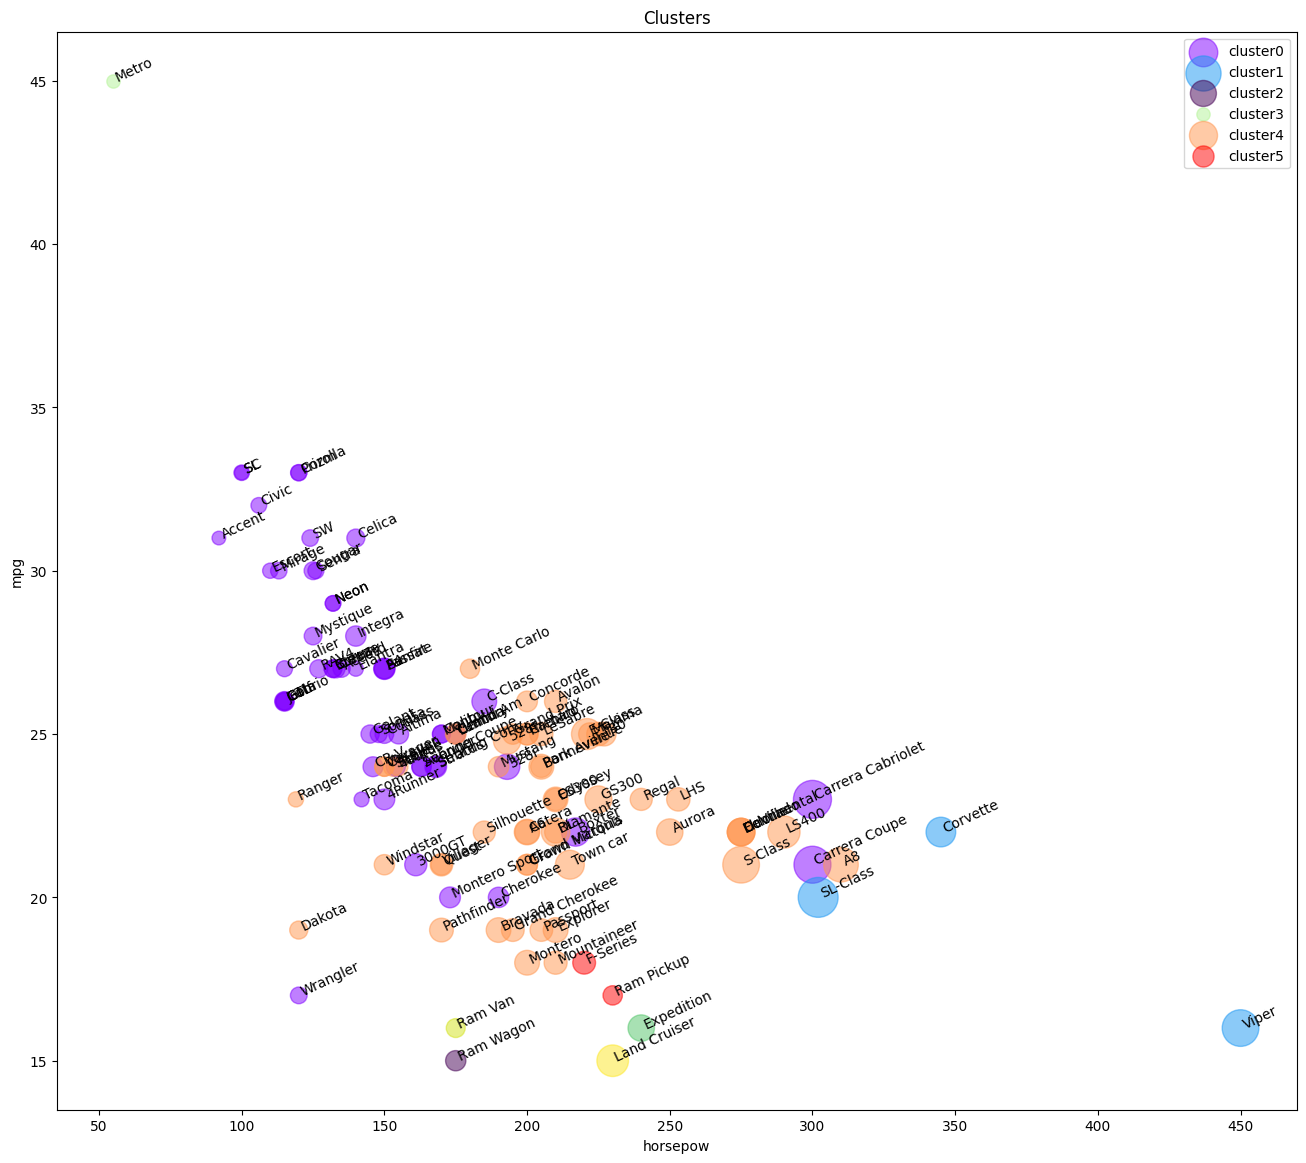

In [52]:
# Plotting dengan scatter plot
# Mengimpor modul colormap dari pustaka Matplotlib
import matplotlib.cm as cm

# Inisialisasi Warna dan Label Klaster
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
# Membuat daftar label klaster.
cluster_labels = list(range(0, n_clusters))

# Membuat gambar dengan ukuran 6x4 inch
plt.figure(figsize=(16,14))

# Visualisasi Setiap Klaster
for color, label in zip(colors, cluster_labels):
  subset = pdf[pdf.cluster_ == label]
  for i in subset.index:
          plt.text(subset.horsepow[i], subset.mpg[i],str(subset['model'][i]), rotation=25)
  plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)

# Penyusunan Legenda dan Label Grafik
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

In [53]:
# Menghitung tipe di setiap cluster
pdf.groupby(['cluster_', 'type'])['cluster_'].count()

cluster_  type
0         0.0     47
          1.0      7
1         0.0      3
2         1.0      4
3         0.0      1
4         0.0     37
          1.0     16
5         1.0      2
Name: cluster_, dtype: int64

In [54]:
# Karakteristik masing-masing cluster
agg_cars = pdf.groupby(['cluster_', 'type'])[['horsepow', 'engine_s', 'mpg', 'price']].mean()
agg_cars

horsepow  engine_s        mpg      price
cluster_ type                                            
0        0.0   146.531915  2.246809  27.021277  20.306128
         1.0   149.714286  2.657143  22.000000  18.551571
1        0.0   365.666667  6.233333  19.333333  66.010000
2        1.0   205.000000  4.275000  15.500000  31.938250
3        0.0    55.000000  1.000000  45.000000   9.235000
4        0.0   217.540541  3.602703  23.481081  31.837027
         1.0   175.250000  3.287500  20.562500  24.674875
5        1.0   225.000000  4.900000  17.500000  23.197500

<ipython-input-55-706e7695cb90>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(subset.loc[i][0] + 5, subset.loc[i][2], 'type=' + str(int(i)) + ', price = ' + str(int(subset.loc[i][3])) + 'k')
<ipython-input-55-706e7695cb90>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.mpg, s = subset.price*20, c = color, label = 'cluster' + str(label))


Text(0, 0.5, 'mpg')

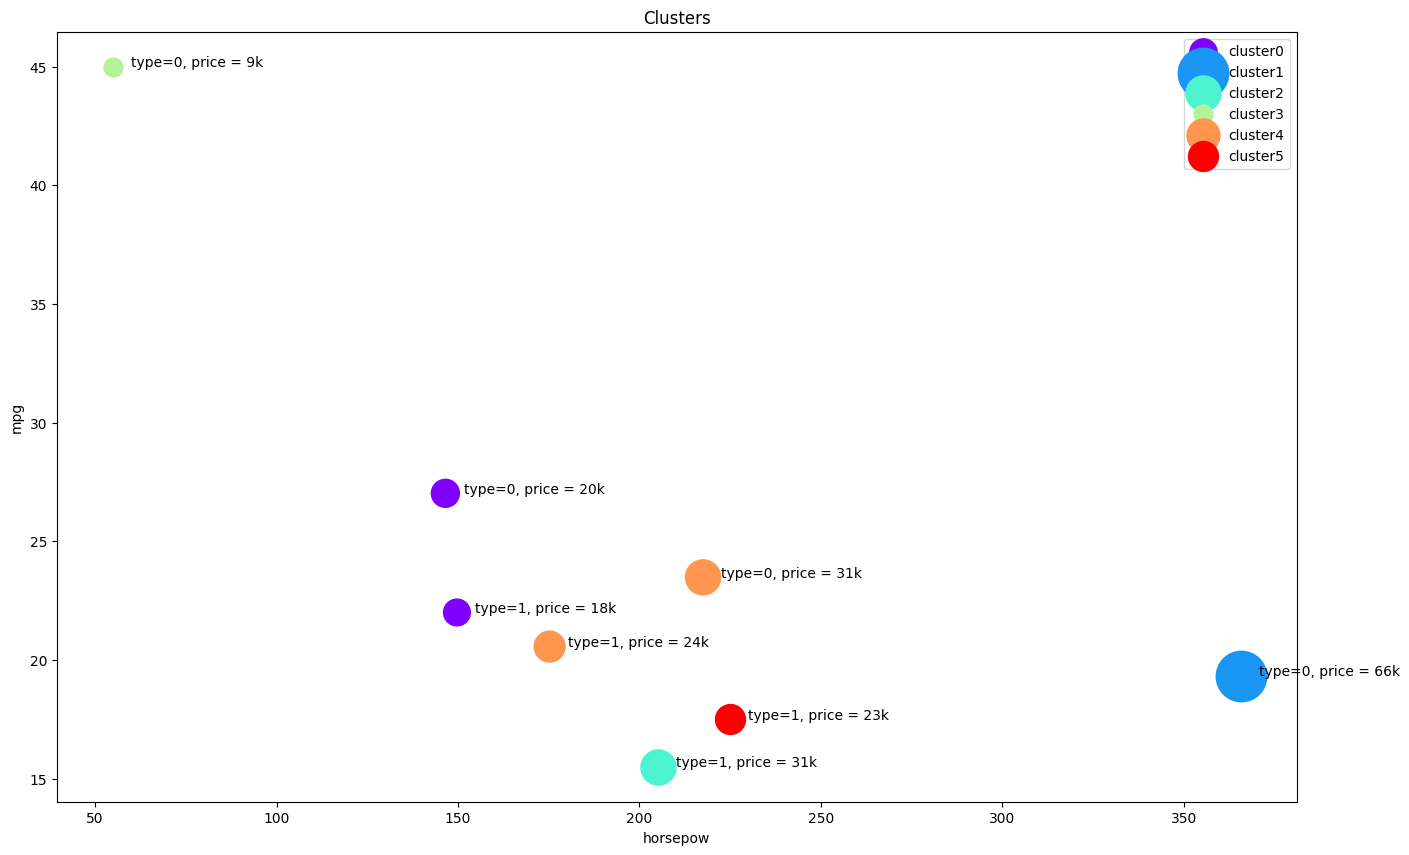

In [55]:
# Plotting dendogram average linkage
# Membuat objek gambar (figure) dengan ukuran 16x10.
plt.figure(figsize=(16, 10))

# Visualisasi Setiap Klaster
for color, label in zip(colors, cluster_labels):
  subset = agg_cars.loc[(label,),]
  for i in subset.index:
    plt.text(subset.loc[i][0] + 5, subset.loc[i][2], 'type=' + str(int(i)) + ', price = ' + str(int(subset.loc[i][3])) + 'k')
  plt.scatter(subset.horsepow, subset.mpg, s = subset.price*20, c = color, label = 'cluster' + str(label))

# Penyusunan Legenda dan Label Grafik
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

## **Perbedaan SciPy dan scikit-learn**
****


**1.   SciPy**
*   Single Linkage dan Average Linkage dapat diimplementasikan menggunakan linkage()
*   Dendrogram yang menggambarkan struktur hierarki kluster
*   Memungkinkan visualisasi dendrogram secara langsung
*   Memerlukan pengolahan lebih lanjut untuk mendapatkan label kluster
*   Mungkin lebih lambat pada dataset besar karena fokus pada analisis dan visualisasi


**2.   scikit-learn**
*   Single Linkage dan Average Linkage ditentukan dengan parameter linkage di AgglomerativeClustering
*   Label kluster langsung tanpa dendrogram
*   Tidak mendukung dendrogram, visualisasi kluster saja
*    Lebih mudah untuk mendapatkan label kluster langsung
*    Lebih efisien dan lebih cepat pada dataset besar dengan penggunaan langsung

# **3. Lakukan agglomerative clustering menggunakan scipy dan scikit-learn dengan single linkage, average linkage, dan complete linkage untuk dataset masing-masing! Jelaskan perbedaannya!**

In [56]:
# Import Library yang dibutuhkan
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

# Import Library yang dibutuhkan untuk proses Agglomerative Clustering
import scipy
from scipy import ndimage
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix

from sklearn import manifold, datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs

In [57]:
# Load dataset Zoo
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/zoo/zoo.data"  # URL dataset Zoo
columns = [  # Menentukan nama kolom dataset sesuai deskripsi dataset
    'animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
    'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
    'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type'
]
pdf = pd.read_csv(url, header=None, names=columns)  # Membaca dataset Zoo dari URL

In [58]:
# Menampilkan dimensi dataset
pdf.shape

(101, 18)

In [59]:
# Menampilkan 10 data teratas
pdf.head(10)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


In [60]:
# Mencetak dimensi dataset sebelum proses pembersihan
print("Dimensi dataset sebelum cleaning:", pdf.size)

# Mengubah kolom tertentu menjadi tipe data numerik, dan mengatasi nilai non-numerik dengan menggantinya menjadi NaN
pdf[['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
    'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
    'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type']].apply(pd.to_numeric, errors='coerce')

# Menghapus baris yang mengandung nilai NaN
pdf = pdf.dropna()
# Mengatur ulang indeks setelah penghapusan baris
pdf = pdf.reset_index(drop=True)
# Mencetak dimensi dataset setelah proses pembersihan
print("Ukuran pdf setelah cleaning:", pdf.size)
# Menampilkan 10 baris pertama dari dataset yang telah dibersihkan
pdf.head(10)

Dimensi dataset sebelum cleaning: 1818
Ukuran pdf setelah cleaning: 1818


,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


In [61]:
# Feature Selection
featureset = pdf[['hair', 'milk', 'backbone', 'breathes', 'legs', 'tail']]
featureset.head()

,hair,milk,backbone,breathes,legs,tail
0,1,1,1,1,4,0
1,1,1,1,1,4,1
2,0,0,1,0,0,1
3,1,1,1,1,4,0
4,1,1,1,1,4,1


In [62]:
from sklearn.preprocessing import MinMaxScaler

# x berisikan nilai dari featureset yang nantinya akan digunakan untuk normalisasi
x = featureset.values

# Membuat objek MinMaxScaler
min_max_scaler = MinMaxScaler()

# Menggunakan fit_transform untuk mengubah nilai variabel dalam rentang 0 hingga 1
feature_mtx = min_max_scaler.fit_transform(x)

# Menampilkan lima baris pertama dari hasil normalisasi
feature_mtx[0:5]

array([[1. , 1. , 1. , 1. , 0.5, 0. ],
       [1. , 1. , 1. , 1. , 0.5, 1. ],
       [0. , 0. , 1. , 0. , 0. , 1. ],
       [1. , 1. , 1. , 1. , 0.5, 0. ],
       [1. , 1. , 1. , 1. , 0.5, 1. ]])

A. Agglomerative Clustering with Scipy, digunakan untuk menghitung jarak antara cluster yang baru terbentuk

In [63]:
# A. Agglomerative Clustering with Scipy, digunakan untuk menghitung jarak antara cluster yang baru terbentuk
import numpy as np
import scipy
import pylab
import scipy.cluster.hierarchy

# Mendapatkan jumlah baris (leng) dalam feature_mtx
leng = feature_mtx.shape[0]

# Inisialisasi matriks jarak D dengan nol menggunakan numpy
D = np.zeros([leng, leng])

# Menghitung jarak euclidean antara setiap pasangan data dalam feature_mtx
for i in range(leng):
    for j in range(leng):
        D[i, j] = np.linalg.norm(feature_mtx[i] - feature_mtx[j])

In [64]:
X = hierarchy.linkage(D, 'single')
Y = hierarchy.linkage(D, 'average')
Z = hierarchy.linkage(D, 'complete')

<ipython-input-64-9e605160fec4>:1: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  X = hierarchy.linkage(D, 'single')
<ipython-input-64-9e605160fec4>:2: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Y = hierarchy.linkage(D, 'average')
<ipython-input-64-9e605160fec4>:3: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(D, 'complete')


In [65]:
# SINGLE LINKAGE
# Menentukan jumlah cluster
from scipy.cluster.hierarchy import fcluster

# Mencetak informasi tentang metode linkage yang digunakan
print("Single Linkage")
# Menentukan batas jarak maksimum (max_d) untuk membentuk cluster
max_d = 3
# Menggunakan fungsi fcluster untuk menentukan cluster
clusters = fcluster(X, max_d, criterion='distance')
clusters

Single Linkage


array([ 3,  2,  1,  3,  2,  2,  2,  1,  1,  3,  2, 10,  1,  6,  6,  6, 10,
        2,  1,  9, 10, 10,  2, 10,  7,  5,  5,  2,  2,  3,  7,  2,  3, 10,
        1,  2,  2, 10,  1,  4,  4, 10,  7, 10,  2,  2,  6,  2,  2,  2,  2,
        4, 10,  6,  2,  2, 10, 10, 10, 10,  1,  1, 10,  2,  2,  2,  9,  2,
        2,  2,  2, 10,  8,  1,  3,  2,  1,  6, 10, 10, 10,  7,  1, 10,  2,
        6,  1, 10,  7,  5, 10, 10,  1,  2,  2, 10,  2,  4,  2,  7, 10],
      dtype=int32)

In [66]:
# Menentukan jumlah cluster
from scipy.cluster.hierarchy import fcluster

# Mencetak informasi tentang metode linkage yang digunakan
print("Single Linkage")
# Menentukan jumlah klaster yang diinginkan (k)
k = 5
# Menggunakan fungsi fcluster untuk menentukan cluster
clusters = fcluster(X, k, criterion = 'maxclust')
clusters

Single Linkage


array([3, 2, 1, 3, 2, 2, 2, 1, 1, 3, 2, 5, 1, 4, 4, 4, 5, 2, 1, 5, 5, 5,
       2, 5, 4, 4, 4, 2, 2, 3, 4, 2, 3, 5, 1, 2, 2, 5, 1, 4, 4, 5, 4, 5,
       2, 2, 4, 2, 2, 2, 2, 4, 5, 4, 2, 2, 5, 5, 5, 5, 1, 1, 5, 2, 2, 2,
       5, 2, 2, 2, 2, 5, 4, 1, 3, 2, 1, 4, 5, 5, 5, 4, 1, 5, 2, 4, 1, 5,
       4, 4, 5, 5, 1, 2, 2, 5, 2, 4, 2, 4, 5], dtype=int32)

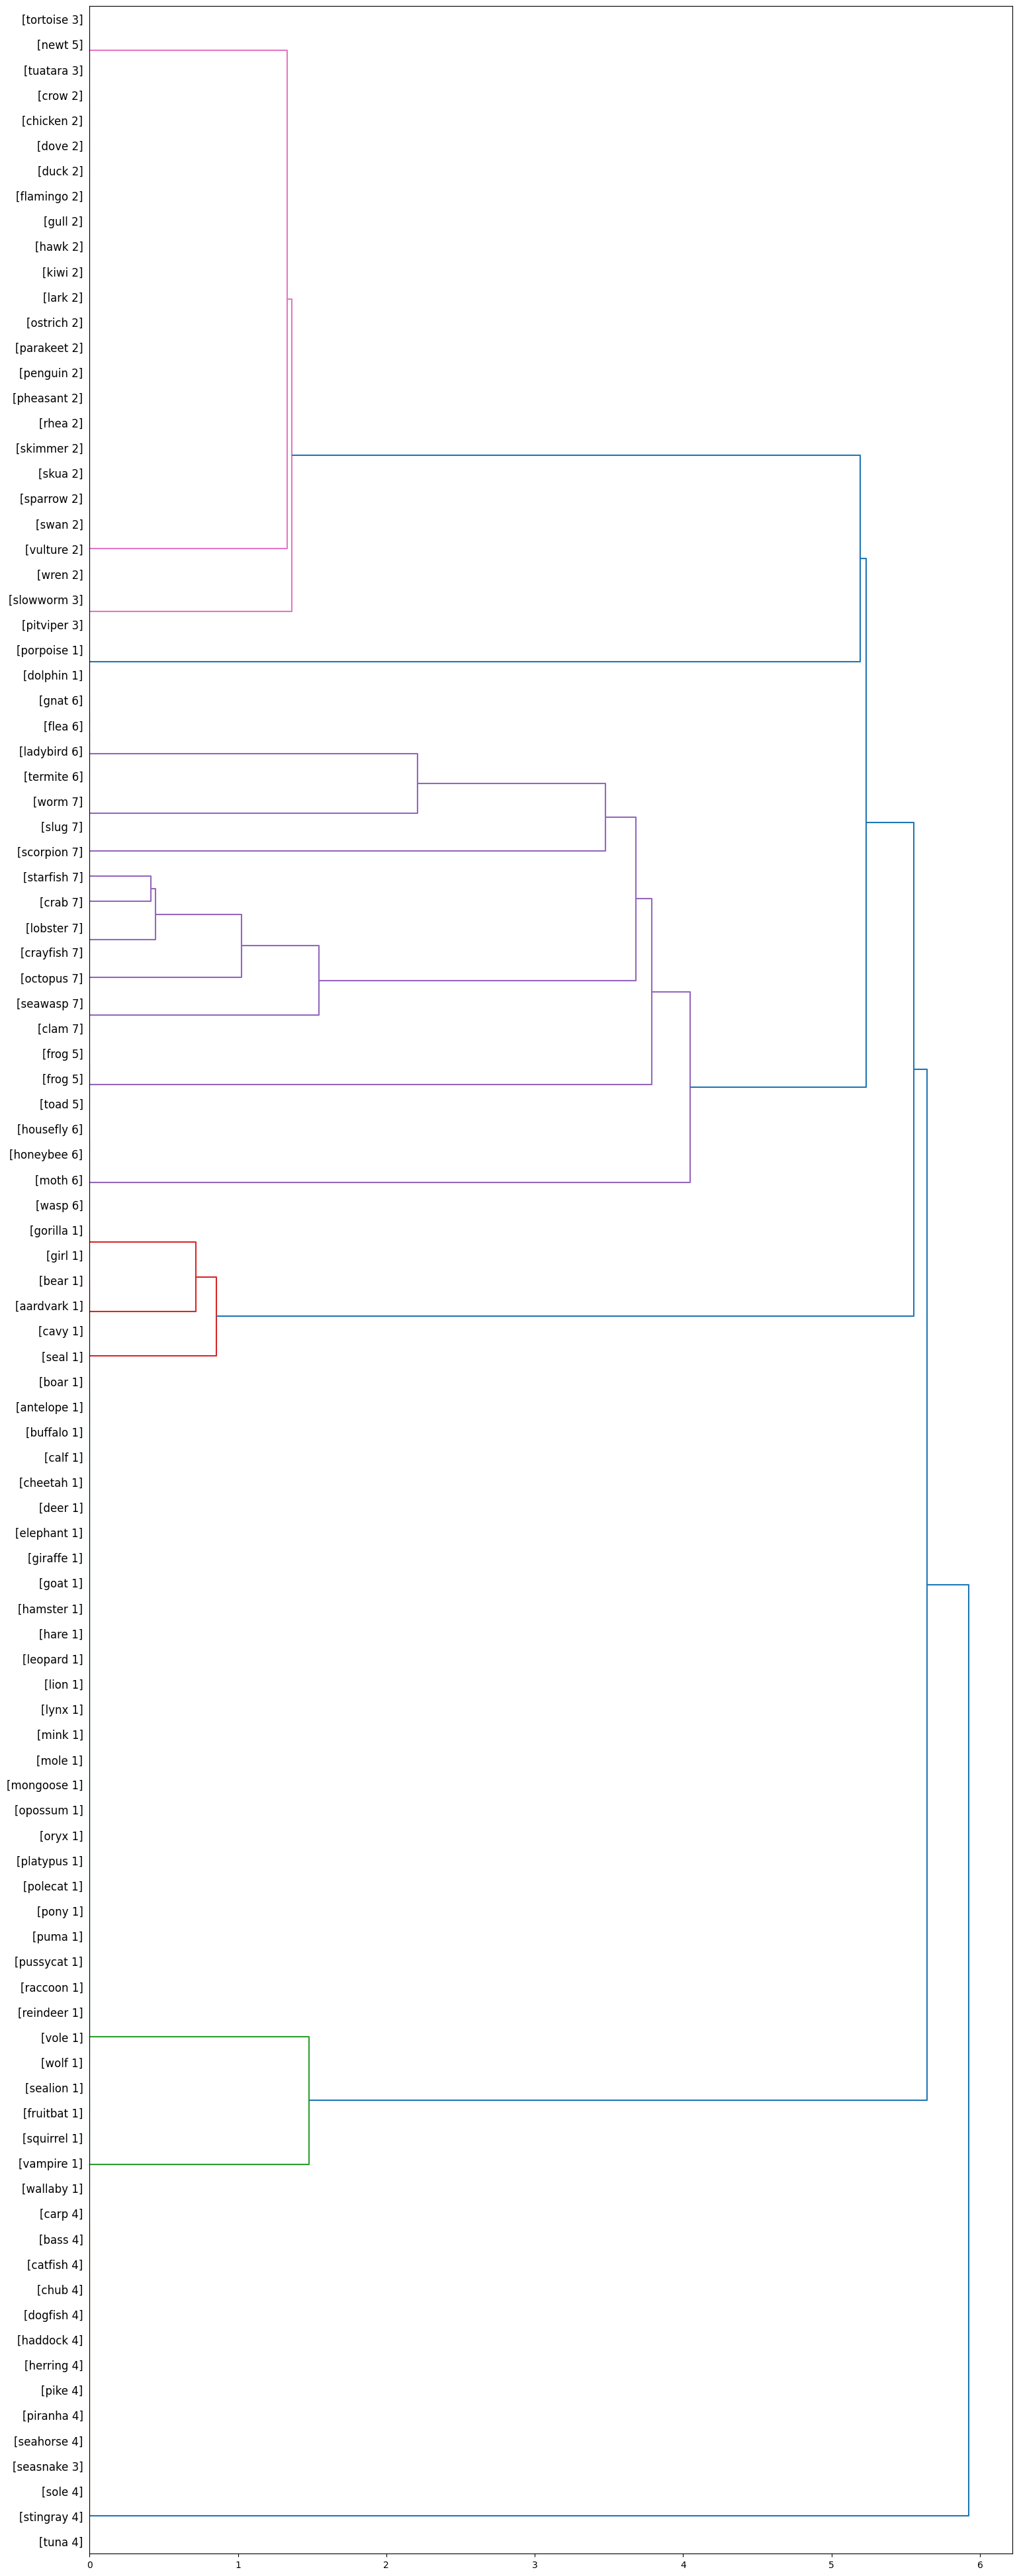

In [70]:
# Plotting Dendogram Single Linkage
# Menentukan ukuran figure yang akan dibuat
fig = pylab.figure(figsize=(18,50))

# Fungsi untuk memberikan label pada leaf (daun) dendrogram
def llf(id):
    return '[%s %s]' % (pdf['animal_name'][id], pdf['class_type'][id])

# Membuat dendrogram
dendro = hierarchy.dendrogram(X, leaf_label_func = llf,
                              leaf_rotation = 0, leaf_font_size = 12, orientation = 'right')

In [71]:
# AVERAGE LINKAGE
# Menentukan jumlah cluster
from scipy.cluster.hierarchy import fcluster

# Mencetak informasi tentang metode linkage yang digunakan
print("Average Linkage")
# Menentukan batas jarak maksimum (max_d) untuk membentuk cluster
max_d = 3
# Menggunakan fungsi fcluster untuk menentukan cluster
clusters = fcluster(Y, max_d, criterion='distance')
clusters

Average Linkage


array([ 1,  2,  8,  1,  2,  2,  2,  8,  8,  1,  2, 10,  8,  5,  5,  5, 10,
        2,  8,  9, 10, 10,  2, 10,  6,  3,  3,  2,  2,  1,  6,  2,  1, 10,
        8,  2,  2, 10,  8,  4,  4, 10,  6, 10,  2,  2,  5,  2,  2,  2,  2,
        4, 10,  5,  2,  2, 10, 10, 10, 10,  8,  8, 10,  2,  2,  2,  9,  2,
        2,  2,  2, 10,  7,  8,  1,  2,  8,  5, 10, 10, 10,  6,  8, 10,  2,
        5,  8, 10,  6,  3, 10, 10,  8,  2,  2, 10,  2,  4,  2,  6, 10],
      dtype=int32)

In [72]:
# Menentukan jumlah cluster
from scipy.cluster.hierarchy import fcluster

# Mencetak informasi tentang metode linkage yang digunakan
print("Average Linkage")
# Menentukan jumlah klaster yang diinginkan (k)
k = 5
# Menggunakan fungsi fcluster untuk menentukan cluster
clusters = fcluster(Y, k, criterion = 'maxclust')
clusters

Average Linkage


array([1, 2, 4, 1, 2, 2, 2, 4, 4, 1, 2, 5, 4, 3, 3, 3, 5, 2, 4, 5, 5, 5,
       2, 5, 3, 3, 3, 2, 2, 1, 3, 2, 1, 5, 4, 2, 2, 5, 4, 3, 3, 5, 3, 5,
       2, 2, 3, 2, 2, 2, 2, 3, 5, 3, 2, 2, 5, 5, 5, 5, 4, 4, 5, 2, 2, 2,
       5, 2, 2, 2, 2, 5, 3, 4, 1, 2, 4, 3, 5, 5, 5, 3, 4, 5, 2, 3, 4, 5,
       3, 3, 5, 5, 4, 2, 2, 5, 2, 3, 2, 3, 5], dtype=int32)

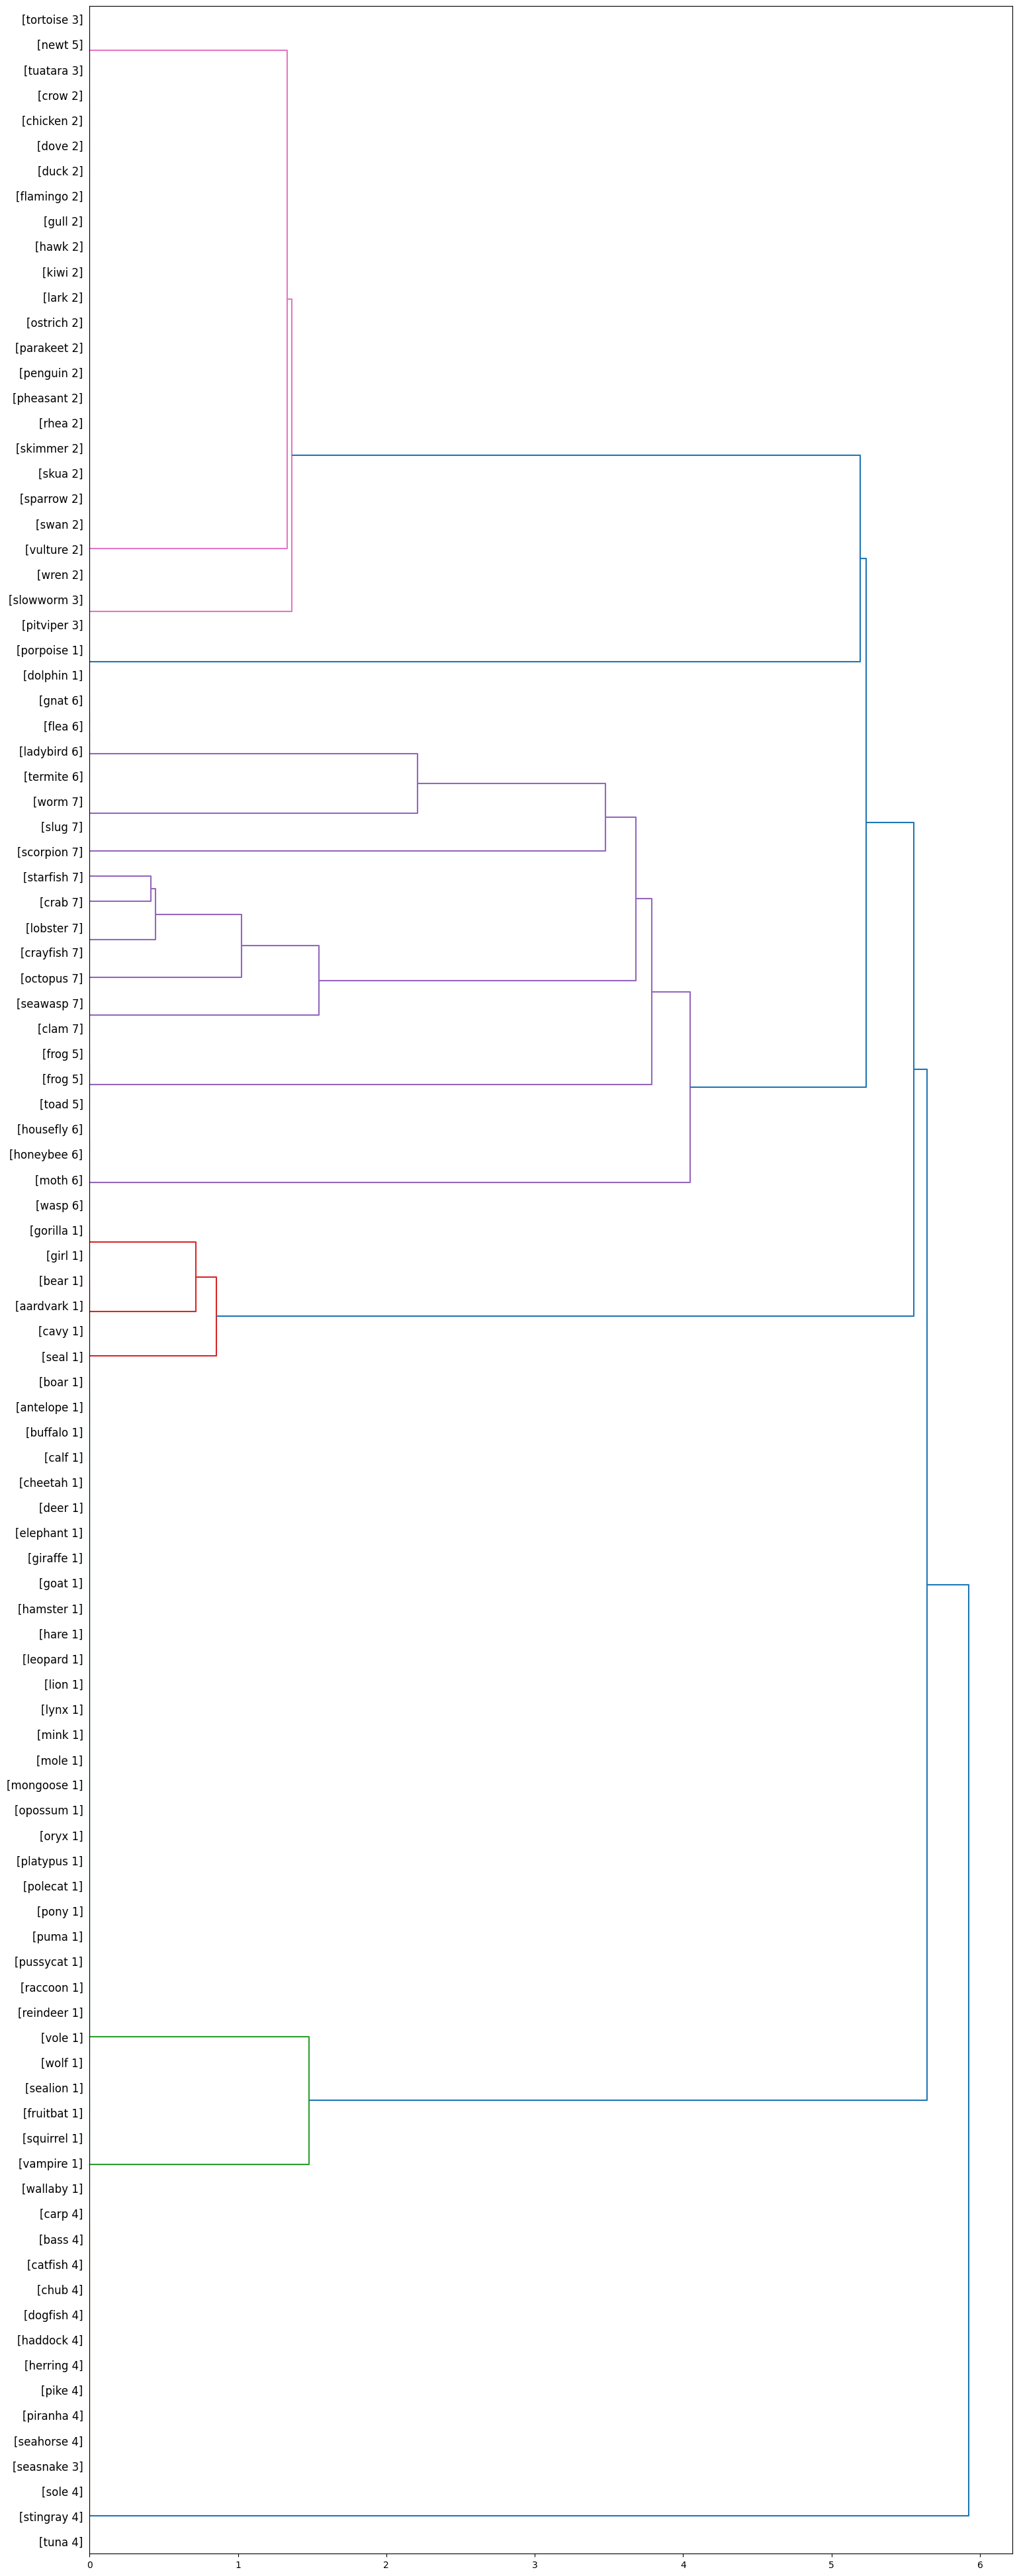

In [73]:
# Plotting Dendogram Average Linkage
# Menentukan ukuran figure yang akan dibuat
fig = pylab.figure(figsize=(18,50))

# Fungsi untuk memberikan label pada leaf (daun) dendrogram
def llf(id):
    return '[%s %s]' % (pdf['animal_name'][id], pdf['class_type'][id])

# Membuat dendrogram
dendro = hierarchy.dendrogram(X, leaf_label_func = llf,
                              leaf_rotation = 0, leaf_font_size = 12, orientation = 'right')

In [74]:
# COMPELETE LINKAGE
# Menentukan jumlah cluster
from scipy.cluster.hierarchy import fcluster

# Mencetak informasi tentang metode linkage yang digunakan
print("Compelete Linkage")
# Menentukan batas jarak maksimum (max_d) untuk membentuk cluster
max_d = 3
# Menggunakan fungsi fcluster untuk menentukan cluster
clusters = fcluster(Z, max_d, criterion='distance')
clusters

Compelete Linkage


array([ 1,  2,  8,  1,  2,  2,  2,  8,  8,  1,  2, 10,  8,  3,  3,  3, 10,
        2,  8,  9, 10, 10,  2, 10,  6,  5,  5,  2,  2,  1,  6,  2,  1, 10,
        8,  2,  2, 10,  8,  4,  4, 10,  6, 10,  2,  2,  3,  2,  2,  2,  2,
        4, 10,  3,  2,  2, 10, 10, 10, 10,  8,  8, 10,  2,  2,  2,  9,  2,
        2,  2,  2, 10,  7,  8,  1,  2,  8,  3, 10, 10, 10,  6,  8, 10,  2,
        3,  8, 10,  6,  5, 10, 10,  8,  2,  2, 10,  2,  4,  2,  6, 10],
      dtype=int32)

In [75]:
# Menentukan jumlah cluster
from scipy.cluster.hierarchy import fcluster

# Mencetak informasi tentang metode linkage yang digunakan
print("Average Linkage")
# Menentukan jumlah klaster yang diinginkan (k)
k = 5
# Menggunakan fungsi fcluster untuk menentukan cluster
clusters = fcluster(Z, k, criterion = 'maxclust')
clusters

Average Linkage


array([1, 1, 4, 1, 1, 1, 1, 4, 4, 1, 1, 5, 4, 2, 2, 2, 5, 1, 4, 5, 5, 5,
       1, 5, 3, 3, 3, 1, 1, 1, 3, 1, 1, 5, 4, 1, 1, 5, 4, 3, 3, 5, 3, 5,
       1, 1, 2, 1, 1, 1, 1, 3, 5, 2, 1, 1, 5, 5, 5, 5, 4, 4, 5, 1, 1, 1,
       5, 1, 1, 1, 1, 5, 3, 4, 1, 1, 4, 2, 5, 5, 5, 3, 4, 5, 1, 2, 4, 5,
       3, 3, 5, 5, 4, 1, 1, 5, 1, 3, 1, 3, 5], dtype=int32)

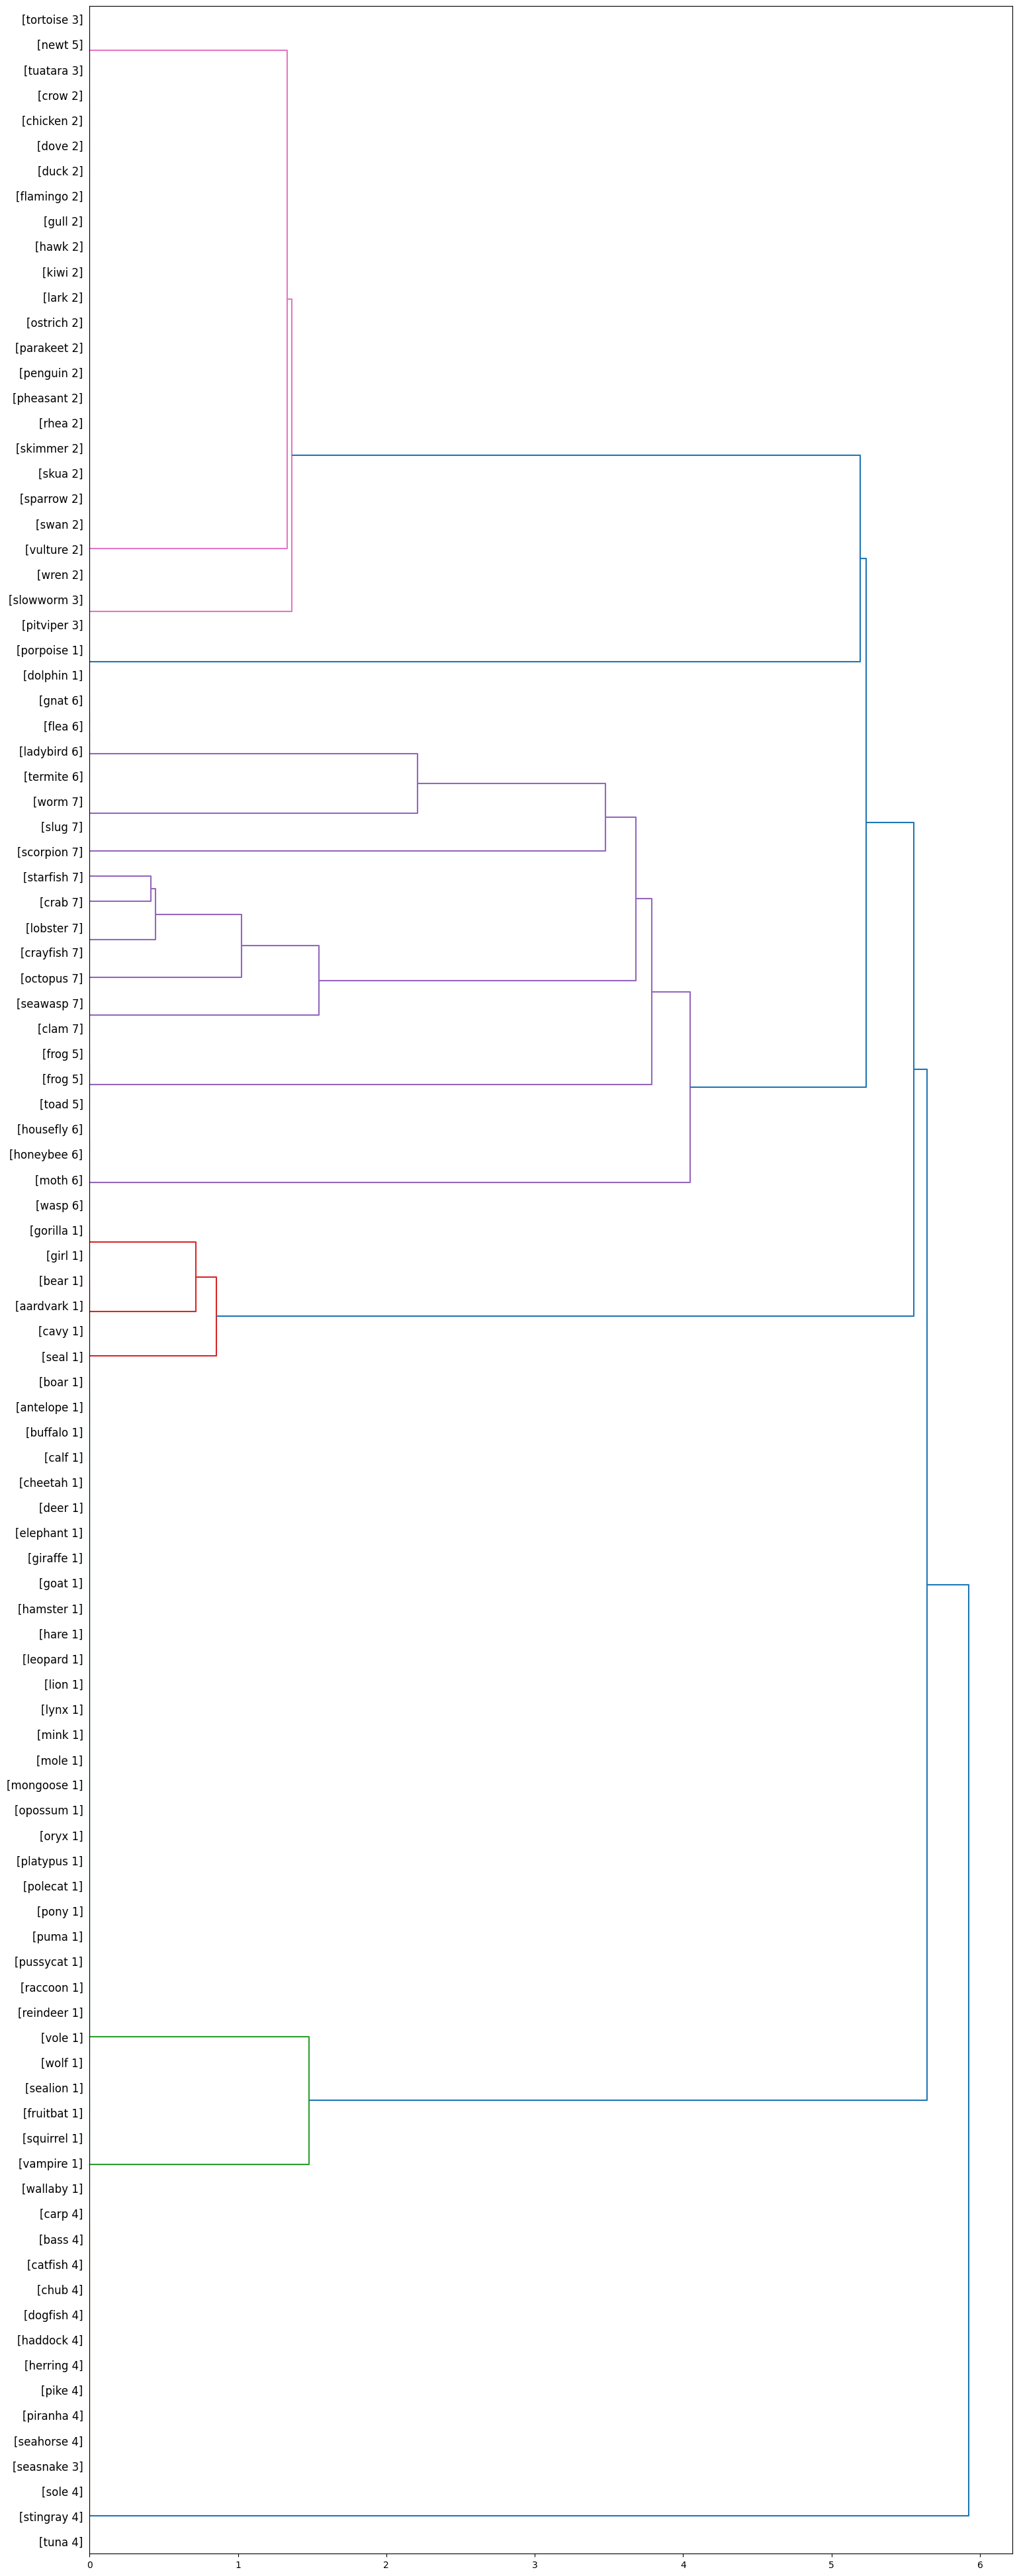

In [76]:
# Plotting Dendogram Complete Linkage
# Menentukan ukuran figure yang akan dibuat
fig = pylab.figure(figsize=(18,50))

# Fungsi untuk memberikan label pada leaf (daun) dendrogram
def llf(id):
    return '[%s %s]' % (pdf['animal_name'][id], pdf['class_type'][id])

# Membuat dendrogram
dendro = hierarchy.dendrogram(X, leaf_label_func = llf,
                              leaf_rotation = 0, leaf_font_size = 12, orientation = 'right')

B. Agglomerative Clustering with Scikit Learn

In [77]:
# Mencari jarak matrix
dist_matrix = distance_matrix(feature_mtx, feature_mtx)

# Mencetak matriks jarak yang dihasilkan
print(dist_matrix)

[[0.         1.         2.06155281 ... 1.         1.80277564 1.75      ]
 [1.         0.         1.80277564 ... 0.         2.06155281 1.43614066]
 [2.06155281 1.80277564 0.         ... 1.80277564 1.73205081 1.03077641]
 ...
 [1.         0.         1.80277564 ... 0.         2.06155281 1.43614066]
 [1.80277564 2.06155281 1.73205081 ... 2.06155281 0.         1.43614066]
 [1.75       1.43614066 1.03077641 ... 1.43614066 1.43614066 0.        ]]


In [78]:
# Single Linkage
# Membuat objek dari kelas AgglomerativeClustering
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'single')

# Melakukan clustering
agglom.fit(feature_mtx)
agglom.labels_

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 5, 5, 5, 0, 1, 0, 0, 0, 0,
       1, 0, 2, 0, 0, 1, 1, 1, 2, 1, 1, 0, 0, 1, 1, 0, 0, 4, 4, 0, 2, 0,
       1, 1, 5, 1, 1, 1, 1, 4, 0, 5, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 3, 0, 1, 1, 0, 5, 0, 0, 0, 2, 0, 0, 1, 5, 0, 0,
       2, 0, 0, 0, 0, 1, 1, 0, 1, 4, 1, 2, 0])

In [79]:
# Menambahkan kolom baru bernama 'cluster_' ke dalam DataFrame pdf
pdf['cluster_'] = agglom.labels_

# Menampilkan lima baris pertama
pdf.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type,cluster_
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,0
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,1


<ipython-input-82-7b73d8ef170f>:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['catsize'], subset['legs'], s=50, c=color, label='cluster' + str(label), alpha=0.5)


Text(0, 0.5, 'legs')

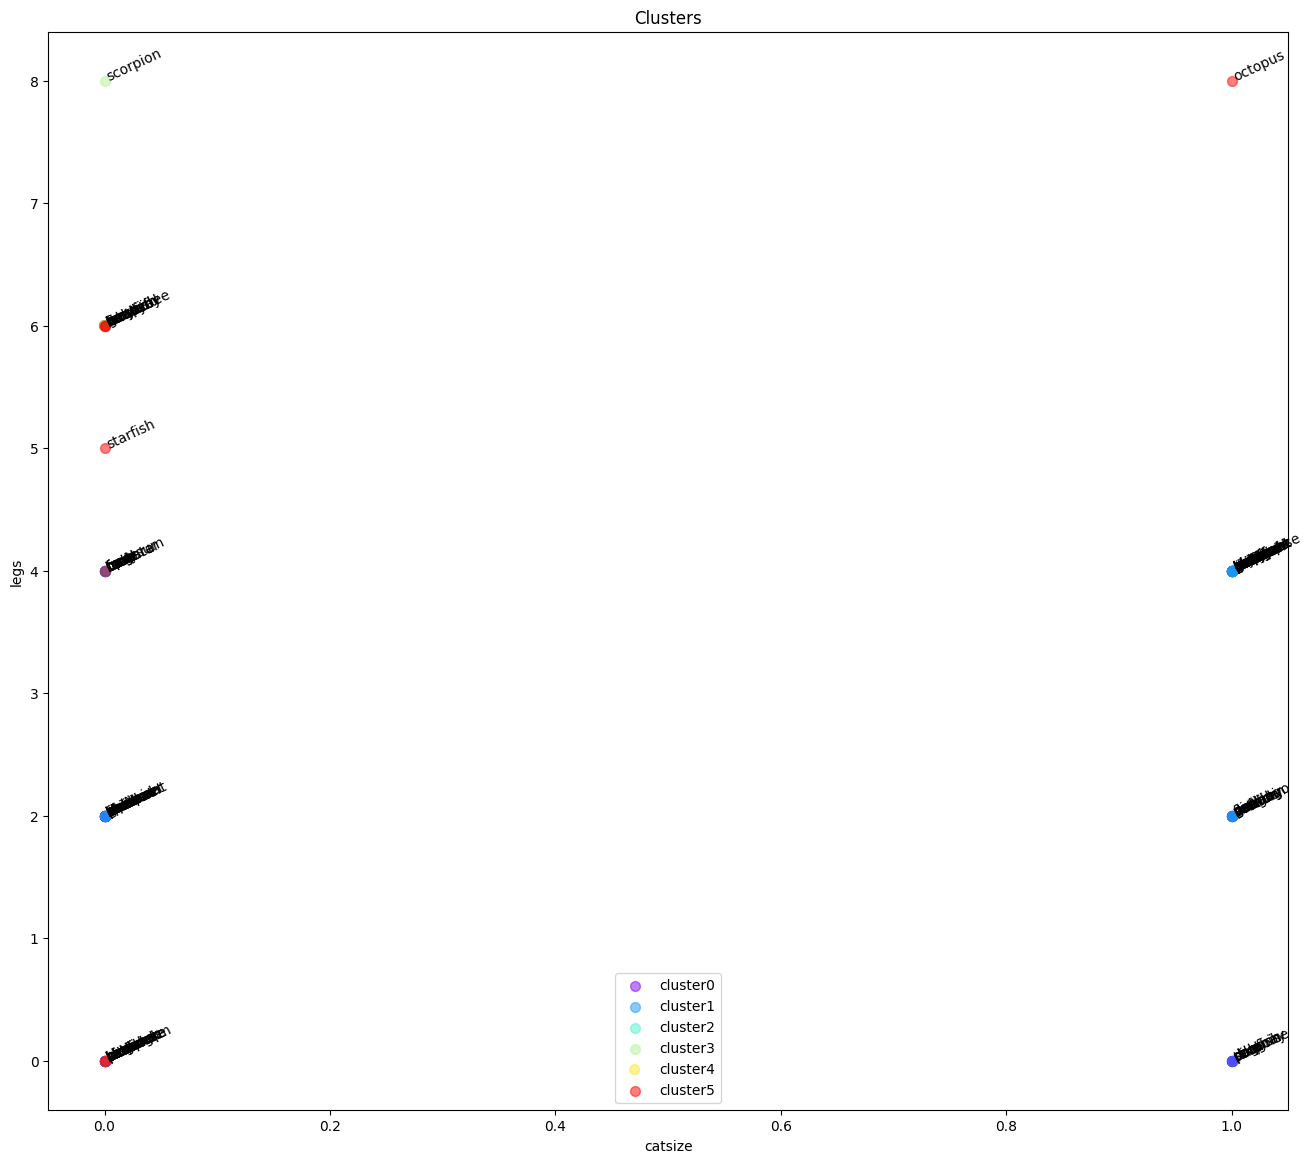

In [82]:
# Plotting dengan scatter plot
# Mengimpor modul colormap dari pustaka Matplotlib
import matplotlib.cm as cm

# Inisialisasi Warna dan Label Klaster
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
# Membuat daftar label klaster.
cluster_labels = list(range(0, n_clusters))

# Membuat gambar dengan ukuran 6x4 inch
plt.figure(figsize=(16,14))

# Visualisasi Setiap Klaster
for color, label in zip(colors, cluster_labels):
    subset = pdf[pdf.cluster_ == label]
    for i in subset.index:
        # Mengganti 'horsepow' dan 'mpg' dengan 'catsize' dan 'legs'
        plt.text(subset['catsize'][i], subset['legs'][i], str(subset['animal_name'][i]), rotation=25)
    plt.scatter(subset['catsize'], subset['legs'], s=50, c=color, label='cluster' + str(label), alpha=0.5)

# Penyusunan Legenda dan Label Grafik
plt.legend()
plt.title('Clusters')
plt.xlabel('catsize')
plt.ylabel('legs')

In [84]:
# Menghitung tipe di setiap cluster
pdf.groupby(['cluster_', 'class_type'])['cluster_'].count()

cluster_  class_type
0         1              2
          2             20
          3              5
          4             13
          5              4
1         1             39
2         6              4
          7              2
3         7              1
4         6              4
5         7              7
Name: cluster_, dtype: int64

In [85]:
# Karakteristik masing-masing cluster berdasarkan kolom yang ada
agg_zoo = pdf.groupby(['cluster_', 'class_type'])[['catsize', 'legs', 'tail']].mean()
agg_zoo

catsize      legs      tail
cluster_ class_type                              
0        1           1.000000  0.000000  1.000000
         2           0.300000  2.000000  1.000000
         3           0.200000  1.600000  1.000000
         4           0.307692  0.000000  1.000000
         5           0.000000  4.000000  0.250000
1        1           0.769231  3.538462  0.846154
2        6           0.000000  6.000000  0.000000
         7           0.000000  0.000000  0.000000
3        7           0.000000  8.000000  1.000000
4        6           0.000000  6.000000  0.000000
5        7           0.142857  4.142857  0.000000

<ipython-input-90-3512f007edbd>:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['catsize_scaled'], subset['tail'], s=subset['catsize_scaled']*100, c=color, label=f'cluster {label}')


6 [ 0.5575694  -0.30593777]
9 [0.71620283 0.22418302]


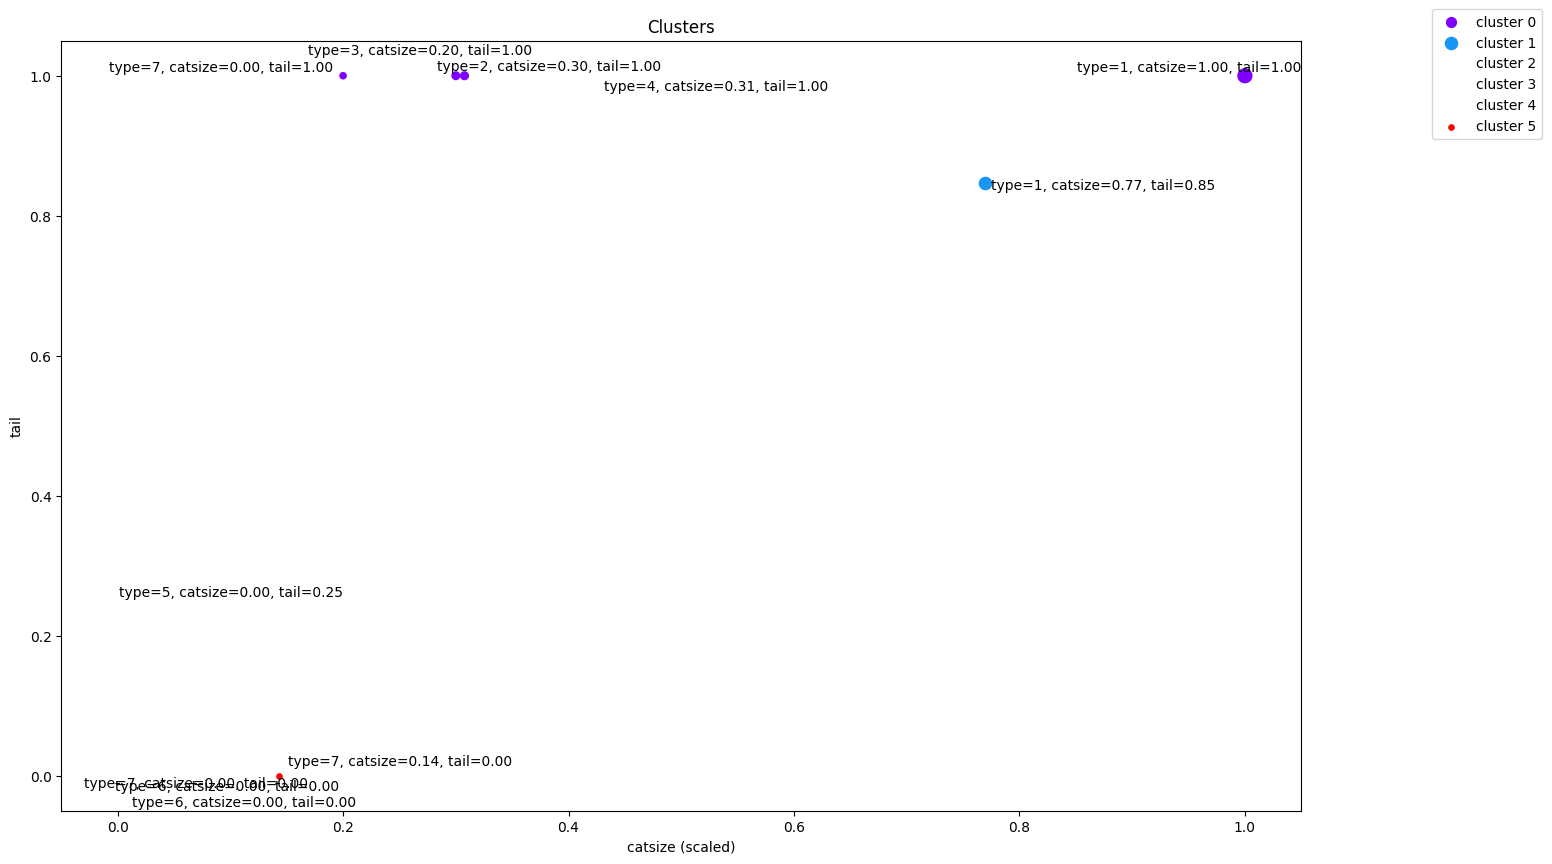

In [90]:
import matplotlib.pyplot as plt
from adjustText import adjust_text
from sklearn.preprocessing import MinMaxScaler

# Normalisasi data catsize
scaler = MinMaxScaler()
agg_zoo['catsize_scaled'] = scaler.fit_transform(agg_zoo[['catsize']])

# Membuat objek gambar
plt.figure(figsize=(16, 10))

# Visualisasi setiap klaster
texts = []
for color, label in zip(colors, cluster_labels):
    subset = agg_zoo.loc[(label,), ]
    for i in subset.index:
        texts.append(plt.text(subset.loc[i]['catsize_scaled'], subset.loc[i]['tail'],
                              f"type={i}, catsize={subset.loc[i]['catsize']:.2f}, tail={subset.loc[i]['tail']:.2f}"))
    plt.scatter(subset['catsize_scaled'], subset['tail'], s=subset['catsize_scaled']*100, c=color, label=f'cluster {label}')

# Menyesuaikan posisi teks
adjust_text(texts)

# Menyusun legenda dan label grafik
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.05))
plt.title('Clusters')
plt.xlabel('catsize (scaled)')
plt.ylabel('tail')
plt.show()


In [91]:
# Mencari jarak matrix
dist_matrix = distance_matrix(feature_mtx, feature_mtx)

# Mencetak matriks jarak yang dihasilkan
print(dist_matrix)

[[0.         1.         2.06155281 ... 1.         1.80277564 1.75      ]
 [1.         0.         1.80277564 ... 0.         2.06155281 1.43614066]
 [2.06155281 1.80277564 0.         ... 1.80277564 1.73205081 1.03077641]
 ...
 [1.         0.         1.80277564 ... 0.         2.06155281 1.43614066]
 [1.80277564 2.06155281 1.73205081 ... 2.06155281 0.         1.43614066]
 [1.75       1.43614066 1.03077641 ... 1.43614066 1.43614066 0.        ]]


In [92]:
# Average Linkage
# Membuat objek dari kelas AgglomerativeClustering
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'average')

# Melakukan clustering
agglom.fit(feature_mtx)
agglom.labels_

array([2, 2, 5, 2, 2, 2, 2, 5, 5, 2, 2, 0, 5, 4, 4, 4, 0, 2, 5, 0, 0, 0,
       2, 0, 1, 0, 0, 2, 2, 2, 1, 2, 2, 0, 5, 2, 2, 0, 5, 1, 1, 0, 1, 0,
       2, 2, 4, 2, 2, 2, 2, 1, 0, 4, 2, 2, 0, 0, 0, 0, 5, 5, 0, 2, 2, 2,
       0, 2, 2, 2, 2, 0, 3, 5, 2, 2, 5, 4, 0, 0, 0, 1, 5, 0, 2, 4, 5, 0,
       1, 0, 0, 0, 5, 2, 2, 0, 2, 1, 2, 1, 0])

In [93]:
# Menambahkan kolom baru bernama 'cluster_' ke dalam DataFrame pdf
pdf['cluster_'] = agglom.labels_

# Menampilkan lima baris pertama
pdf.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type,cluster_
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,2
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,2
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,5
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,2
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,2


<ipython-input-94-7b73d8ef170f>:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['catsize'], subset['legs'], s=50, c=color, label='cluster' + str(label), alpha=0.5)


Text(0, 0.5, 'legs')

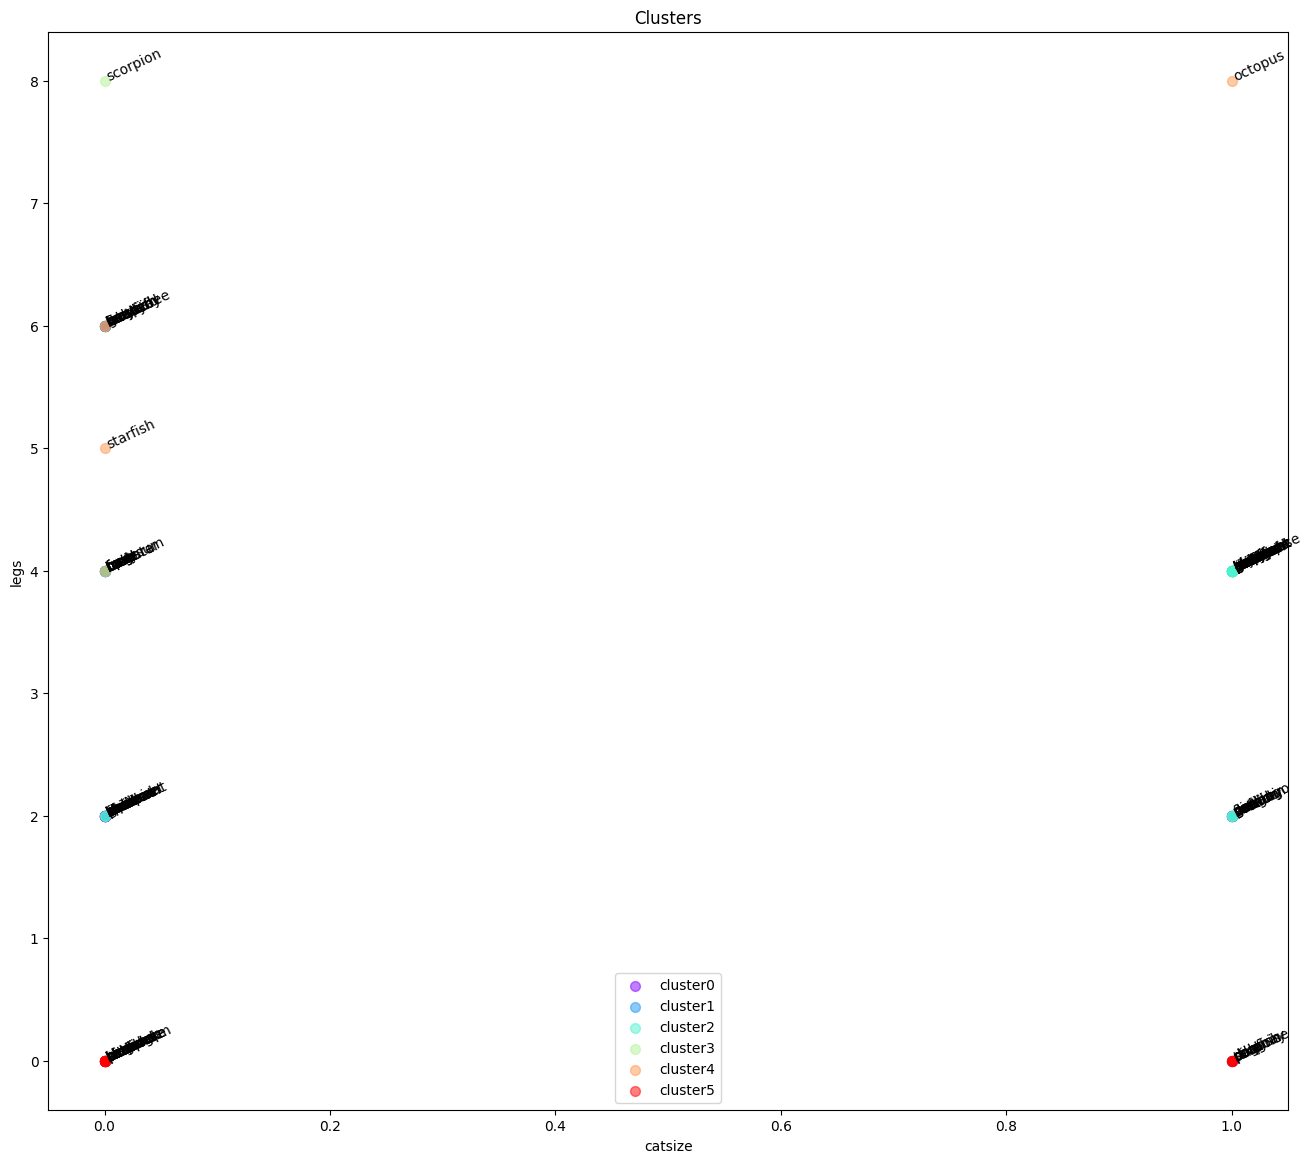

In [94]:
# Plotting dengan scatter plot
# Mengimpor modul colormap dari pustaka Matplotlib
import matplotlib.cm as cm

# Inisialisasi Warna dan Label Klaster
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
# Membuat daftar label klaster.
cluster_labels = list(range(0, n_clusters))

# Membuat gambar dengan ukuran 6x4 inch
plt.figure(figsize=(16,14))

# Visualisasi Setiap Klaster
for color, label in zip(colors, cluster_labels):
    subset = pdf[pdf.cluster_ == label]
    for i in subset.index:
        # Mengganti 'horsepow' dan 'mpg' dengan 'catsize' dan 'legs'
        plt.text(subset['catsize'][i], subset['legs'][i], str(subset['animal_name'][i]), rotation=25)
    plt.scatter(subset['catsize'], subset['legs'], s=50, c=color, label='cluster' + str(label), alpha=0.5)

# Penyusunan Legenda dan Label Grafik
plt.legend()
plt.title('Clusters')
plt.xlabel('catsize')
plt.ylabel('legs')

In [95]:
# Menghitung tipe di setiap cluster
pdf.groupby(['cluster_', 'class_type'])['cluster_'].count()

cluster_  class_type
0         1              2
          2             20
          3              4
          5              4
1         6              8
          7              2
2         1             39
3         7              1
4         7              7
5         3              1
          4             13
Name: cluster_, dtype: int64

In [96]:
# Karakteristik masing-masing cluster berdasarkan kolom yang ada
agg_zoo = pdf.groupby(['cluster_', 'class_type'])[['catsize', 'legs', 'tail']].mean()
agg_zoo

catsize      legs      tail
cluster_ class_type                              
0        1           1.000000  0.000000  1.000000
         2           0.300000  2.000000  1.000000
         3           0.250000  2.000000  1.000000
         5           0.000000  4.000000  0.250000
1        6           0.000000  6.000000  0.000000
         7           0.000000  0.000000  0.000000
2        1           0.769231  3.538462  0.846154
3        7           0.000000  8.000000  1.000000
4        7           0.142857  4.142857  0.000000
5        3           0.000000  0.000000  1.000000
         4           0.307692  0.000000  1.000000

<ipython-input-97-29b8526d7300>:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['catsize_scaled'], subset['tail'], s=subset['catsize_scaled']*100, c=color, label=f'cluster {label}')


7 [ 0.69635865 -0.07874488]
9 [-0.71185611  0.30233748]


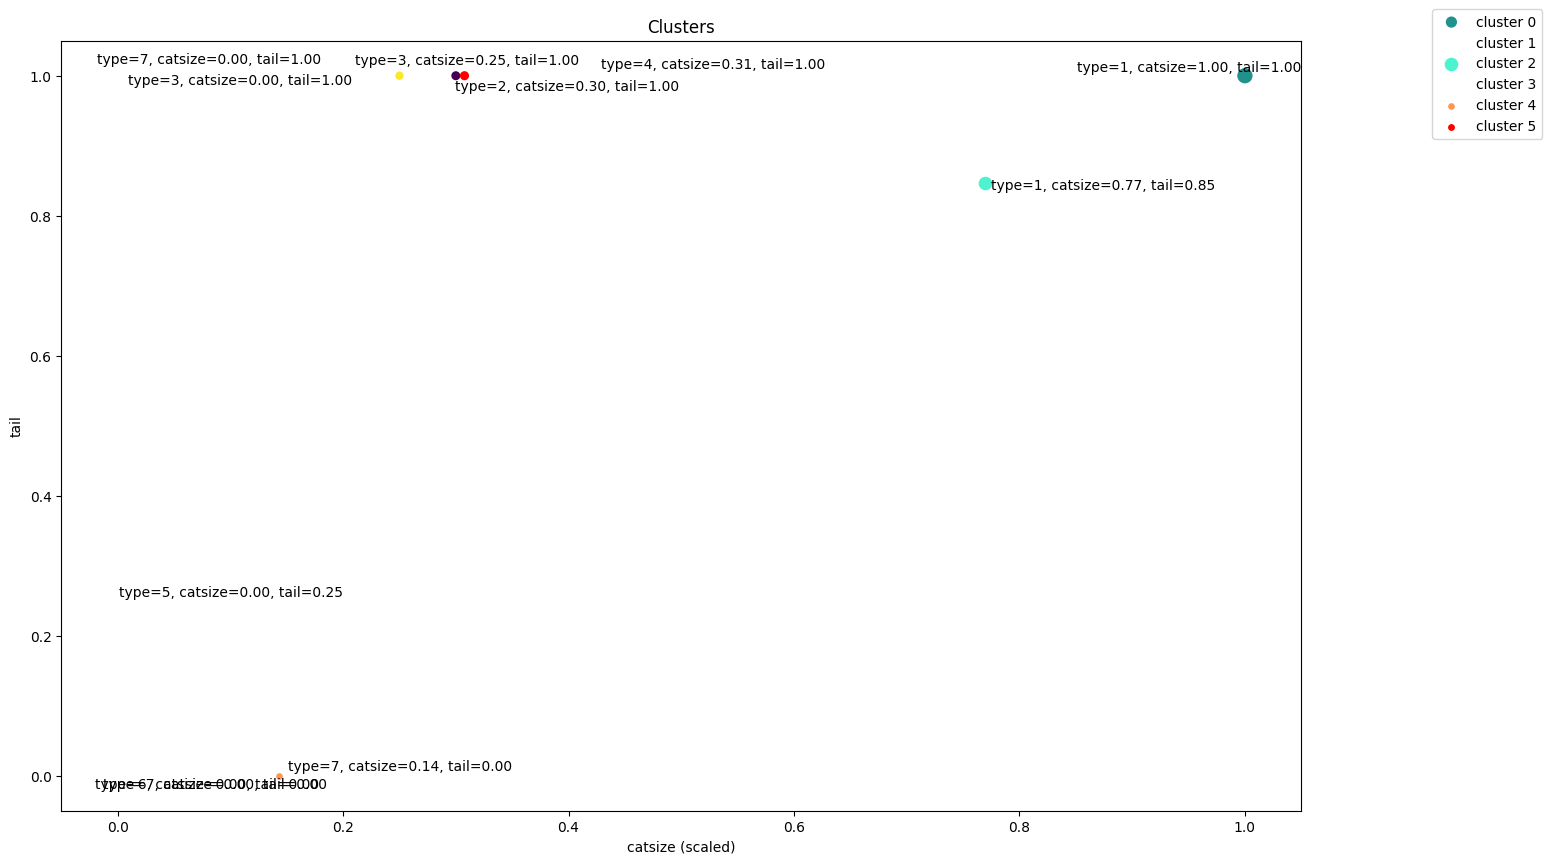

In [97]:
import matplotlib.pyplot as plt
from adjustText import adjust_text
from sklearn.preprocessing import MinMaxScaler

# Normalisasi data catsize
scaler = MinMaxScaler()
agg_zoo['catsize_scaled'] = scaler.fit_transform(agg_zoo[['catsize']])

# Membuat objek gambar
plt.figure(figsize=(16, 10))

# Visualisasi setiap klaster
texts = []
for color, label in zip(colors, cluster_labels):
    subset = agg_zoo.loc[(label,), ]
    for i in subset.index:
        texts.append(plt.text(subset.loc[i]['catsize_scaled'], subset.loc[i]['tail'],
                              f"type={i}, catsize={subset.loc[i]['catsize']:.2f}, tail={subset.loc[i]['tail']:.2f}"))
    plt.scatter(subset['catsize_scaled'], subset['tail'], s=subset['catsize_scaled']*100, c=color, label=f'cluster {label}')

# Menyesuaikan posisi teks
adjust_text(texts)

# Menyusun legenda dan label grafik
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.05))
plt.title('Clusters')
plt.xlabel('catsize (scaled)')
plt.ylabel('tail')
plt.show()

In [98]:
# Mencari jarak matrix
dist_matrix = distance_matrix(feature_mtx, feature_mtx)

# Mencetak matriks jarak yang dihasilkan
print(dist_matrix)

[[0.         1.         2.06155281 ... 1.         1.80277564 1.75      ]
 [1.         0.         1.80277564 ... 0.         2.06155281 1.43614066]
 [2.06155281 1.80277564 0.         ... 1.80277564 1.73205081 1.03077641]
 ...
 [1.         0.         1.80277564 ... 0.         2.06155281 1.43614066]
 [1.80277564 2.06155281 1.73205081 ... 2.06155281 0.         1.43614066]
 [1.75       1.43614066 1.03077641 ... 1.43614066 1.43614066 0.        ]]


In [99]:
# Complete Linkage
# Membuat objek dari kelas AgglomerativeClustering
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')

# Melakukan clustering
agglom.fit(feature_mtx)
agglom.labels_

array([5, 3, 2, 5, 3, 3, 3, 2, 2, 5, 3, 2, 2, 4, 4, 4, 2, 3, 2, 3, 2, 2,
       3, 2, 1, 1, 1, 3, 3, 5, 1, 3, 5, 2, 2, 3, 3, 2, 2, 0, 0, 2, 1, 2,
       3, 3, 4, 3, 3, 3, 3, 0, 2, 4, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 2, 0, 2, 5, 3, 2, 4, 2, 2, 2, 1, 2, 2, 3, 4, 2, 2,
       1, 1, 2, 2, 2, 3, 3, 2, 3, 0, 3, 1, 2])

In [100]:
# Menambahkan kolom baru bernama 'cluster_' ke dalam DataFrame pdf
pdf['cluster_'] = agglom.labels_

# Menampilkan lima baris pertama
pdf.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type,cluster_
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,5
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,3
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,2
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,5
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,3


<ipython-input-101-7b73d8ef170f>:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['catsize'], subset['legs'], s=50, c=color, label='cluster' + str(label), alpha=0.5)


Text(0, 0.5, 'legs')

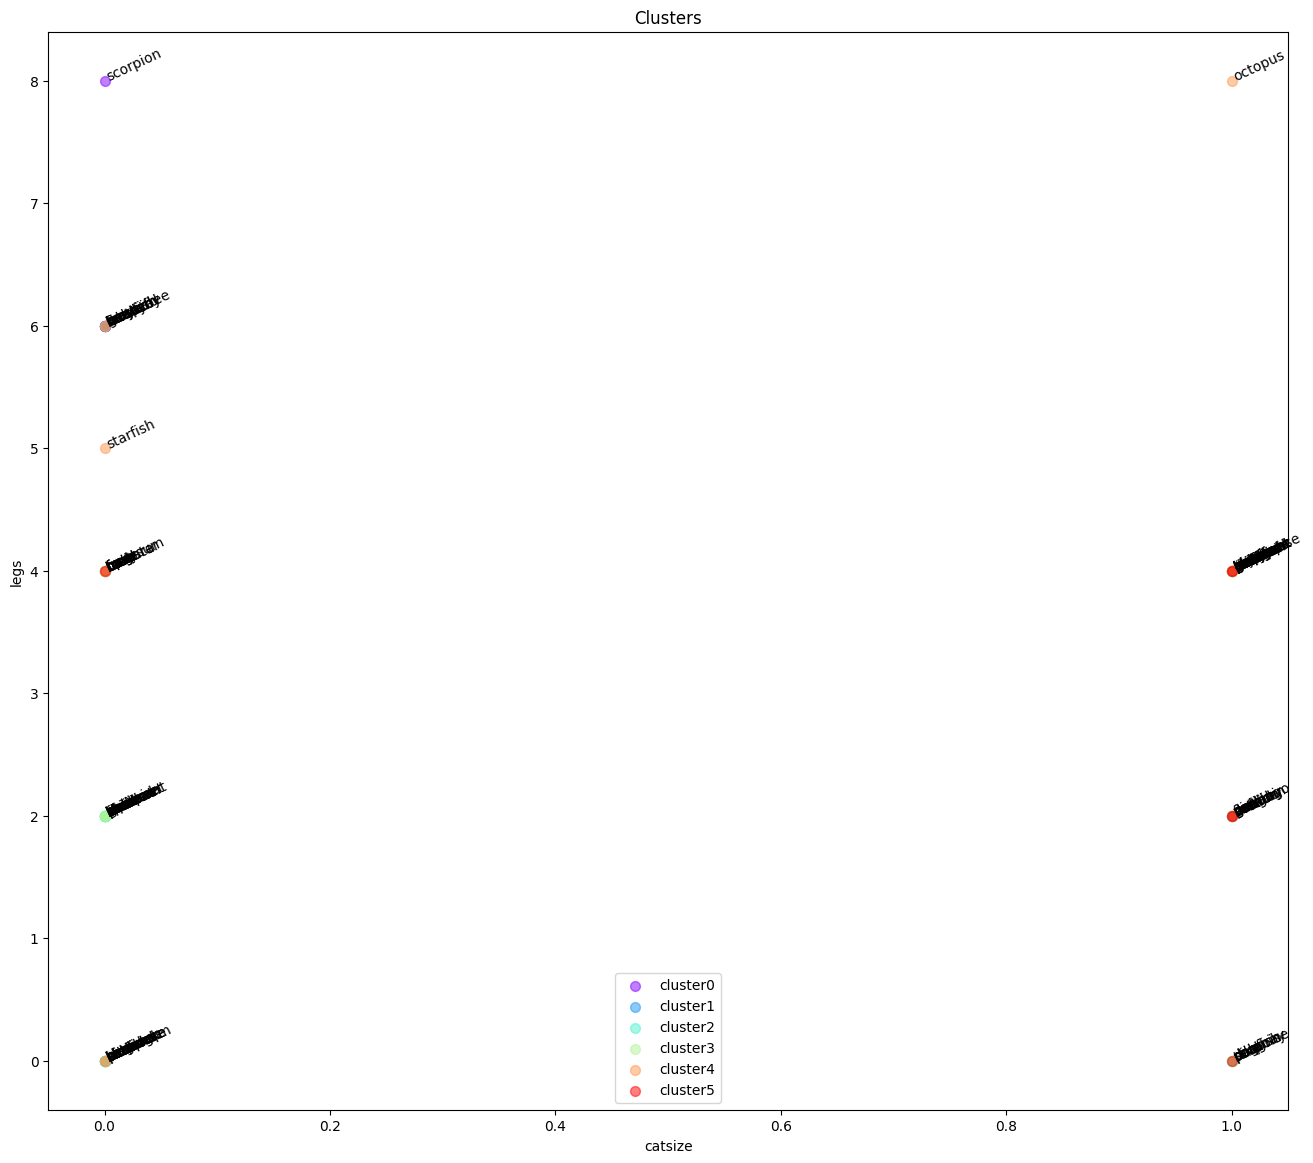

In [101]:
# Plotting dengan scatter plot
# Mengimpor modul colormap dari pustaka Matplotlib
import matplotlib.cm as cm

# Inisialisasi Warna dan Label Klaster
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
# Membuat daftar label klaster.
cluster_labels = list(range(0, n_clusters))

# Membuat gambar dengan ukuran 6x4 inch
plt.figure(figsize=(16,14))

# Visualisasi Setiap Klaster
for color, label in zip(colors, cluster_labels):
    subset = pdf[pdf.cluster_ == label]
    for i in subset.index:
        # Mengganti 'horsepow' dan 'mpg' dengan 'catsize' dan 'legs'
        plt.text(subset['catsize'][i], subset['legs'][i], str(subset['animal_name'][i]), rotation=25)
    plt.scatter(subset['catsize'], subset['legs'], s=50, c=color, label='cluster' + str(label), alpha=0.5)

# Penyusunan Legenda dan Label Grafik
plt.legend()
plt.title('Clusters')
plt.xlabel('catsize')
plt.ylabel('legs')

In [102]:
# Menghitung tipe di setiap cluster
pdf.groupby(['cluster_', 'class_type'])['cluster_'].count()

cluster_  class_type
0         6              4
          7              1
1         5              3
          6              4
          7              2
2         2             20
          3              5
          4             13
          5              1
3         1             35
4         7              7
5         1              6
Name: cluster_, dtype: int64

In [103]:
# Karakteristik masing-masing cluster berdasarkan kolom yang ada
agg_zoo = pdf.groupby(['cluster_', 'class_type'])[['catsize', 'legs', 'tail']].mean()
agg_zoo

catsize      legs  tail
cluster_ class_type                          
0        6           0.000000  6.000000   0.0
         7           0.000000  8.000000   1.0
1        5           0.000000  4.000000   0.0
         6           0.000000  6.000000   0.0
         7           0.000000  0.000000   0.0
2        2           0.300000  2.000000   1.0
         3           0.200000  1.600000   1.0
         4           0.307692  0.000000   1.0
         5           0.000000  4.000000   1.0
3        1           0.771429  3.485714   1.0
4        7           0.142857  4.142857   0.0
5        1           0.833333  2.666667   0.0

<ipython-input-104-29b8526d7300>:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['catsize_scaled'], subset['tail'], s=subset['catsize_scaled']*100, c=color, label=f'cluster {label}')


2 [ 0.54256561 -0.2220258 ]
4 [-0.07461859  0.61564676]
0 [ 0.44210668 -0.84571719]
3 [0.12937501 0.15426289]
1 [-0.43726047  0.89713465]
8 [-0.36148111 -0.40078059]


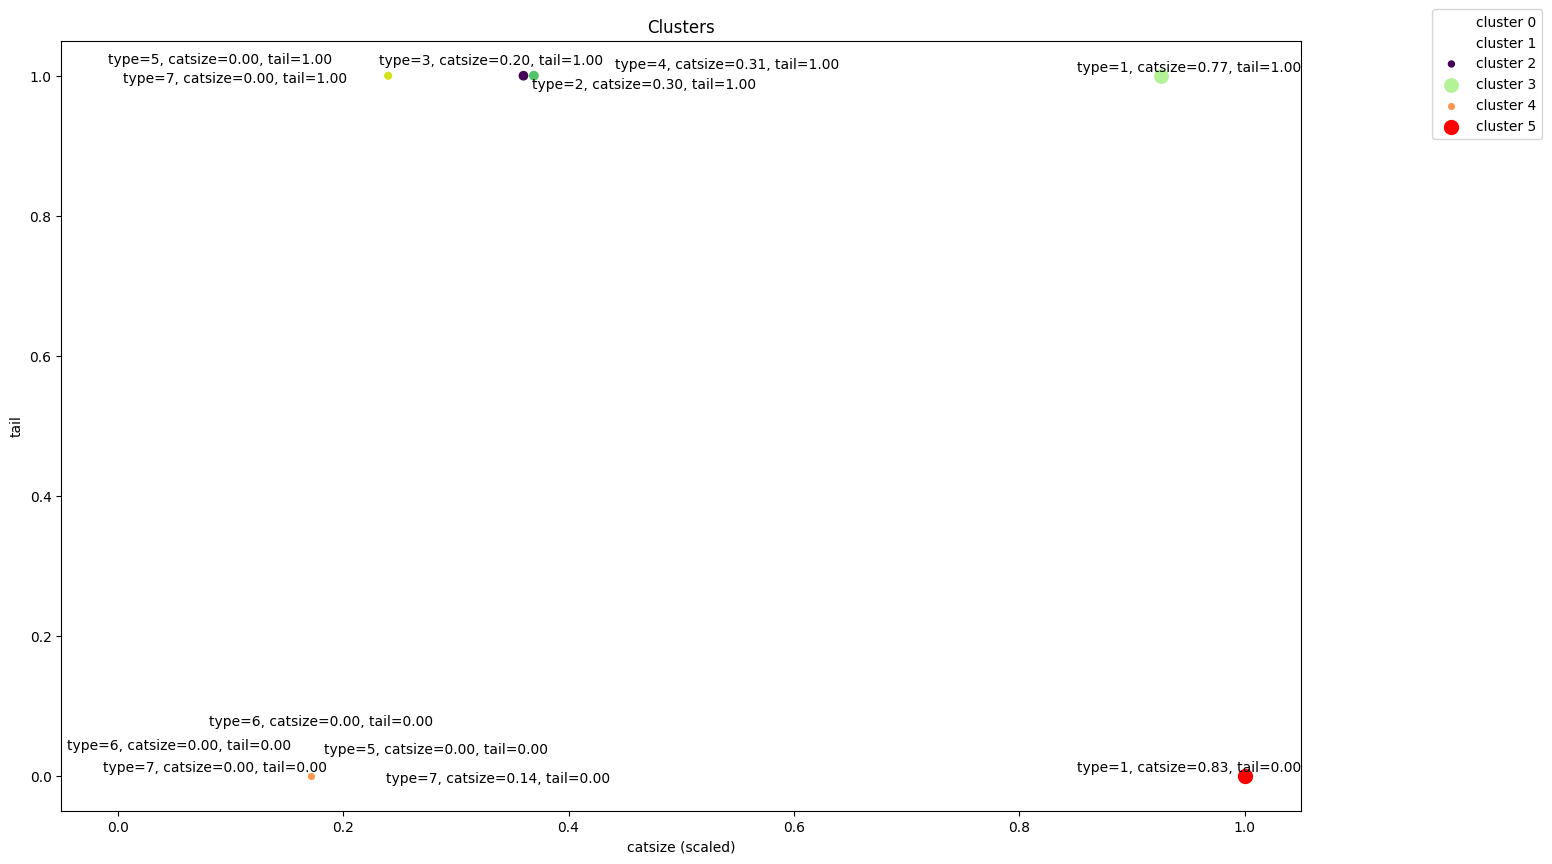

In [104]:
import matplotlib.pyplot as plt
from adjustText import adjust_text
from sklearn.preprocessing import MinMaxScaler

# Normalisasi data catsize
scaler = MinMaxScaler()
agg_zoo['catsize_scaled'] = scaler.fit_transform(agg_zoo[['catsize']])

# Membuat objek gambar
plt.figure(figsize=(16, 10))

# Visualisasi setiap klaster
texts = []
for color, label in zip(colors, cluster_labels):
    subset = agg_zoo.loc[(label,), ]
    for i in subset.index:
        texts.append(plt.text(subset.loc[i]['catsize_scaled'], subset.loc[i]['tail'],
                              f"type={i}, catsize={subset.loc[i]['catsize']:.2f}, tail={subset.loc[i]['tail']:.2f}"))
    plt.scatter(subset['catsize_scaled'], subset['tail'], s=subset['catsize_scaled']*100, c=color, label=f'cluster {label}')

# Menyesuaikan posisi teks
adjust_text(texts)

# Menyusun legenda dan label grafik
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.05))
plt.title('Clusters')
plt.xlabel('catsize (scaled)')
plt.ylabel('tail')
plt.show()

**Perbedaannya**
****
**1. Single Linkage**
* SciPy: Dalam metode ini, linkage() menghitung jarak antara dua kluster berdasarkan jarak terdekat antara elemen dari kedua kluster. Ini menyebabkan kluster rantai di mana dua kluster dapat bergabung meskipun ada jarak jauh di bagian tengahnya, karena hanya mempertimbangkan jarak terkecil.
* scikit-learn: AgglomerativeClustering dengan linkage='single' bekerja dengan cara yang sama, menggabungkan kluster berdasarkan jarak minimum antar titik, menghasilkan bentuk kluster yang lebih panjang dan lebih sensitif terhadap outlier.

**2. Average Linkage**
* SciPy: linkage() menghitung jarak antara dua kluster berdasarkan rata-rata jarak antar elemen dari kedua kluster. Metode ini menghasilkan kluster yang lebih seimbang dibandingkan dengan single linkage.
* scikit-learn: Dengan linkage='average', kluster digabungkan berdasarkan jarak rata-rata antar titik dalam kedua kluster. Hasilnya adalah kluster yang lebih stabil dan tidak terpengaruh oleh outlier sebanyak single linkage.

**3. Complete Linkage**
* SciPy: linkage() menggunakan jarak terbesar antar titik di dua kluster untuk menentukan apakah mereka harus digabungkan. Kluster yang lebih kompak dan homogen akan terbentuk karena setiap kluster diukur dengan jarak terjauh di antara titik-titiknya.
* scikit-learn: Dengan linkage='complete', kluster digabungkan berdasarkan jarak maksimum antar titik dalam dua kluster. Metode ini memisahkan kluster dengan lebih jelas, cenderung menghindari kluster yang besar dan longgar.

# **4. ⁠Lakukan Principal Component Analysis untuk dataset masing-masing!**

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [107]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/zoo/zoo.data"
df = pd.read_csv(url, names=['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic',
           'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins',
           'legs', 'tail', 'domestic', 'catsize', 'type'])

Standarisasi Data

In [109]:
features = ['hair', 'milk', 'legs', 'tail']
x = df.loc[:, features].values
y = df.loc[:,['type']].values
x = StandardScaler().fit_transform(x)

Proyeksi PCA ke 2D

In [110]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [112]:
finalDf = pd.concat([principalDf, df[['type']]], axis = 1)

Visualisasikan Proyeksi 2D

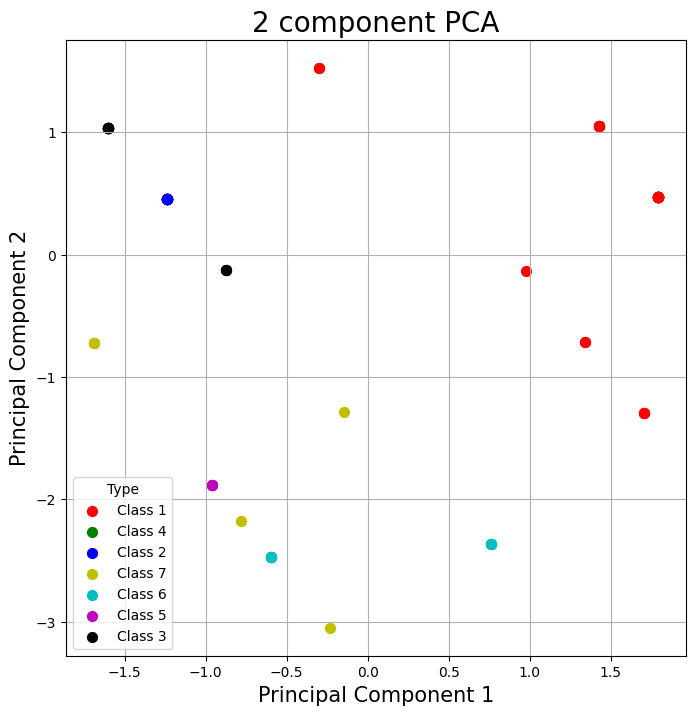

In [117]:
import matplotlib.pyplot as plt

# Membuat plot
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

# Menyusun targets dan warna
targets = [1, 4, 2, 7, 6, 5, 3]  # Menyesuaikan dengan nilai unik 'type'
colors = ['r', 'g', 'b', 'y', 'c', 'm', 'k']  # Setiap kategori mendapatkan warna berbeda

# Loop untuk setiap target dan warna
for target, color in zip(targets, colors):
    indicesToKeep = finalDf['type'] == target  # Memastikan 'type' cocok dengan target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
               finalDf.loc[indicesToKeep, 'principal component 2'],
               c = color,
               s = 50, label=f'Class {target}')

# Menambahkan legenda dan grid
ax.legend(title="Type")
ax.grid()

Varians yang dijelaskan

In [118]:
pca.explained_variance_ratio_

array([0.5141142 , 0.33366657])

Kesimpulan:
1. Komponen Utama 1 (PC1) menjelaskan sekitar 51.41% dari variansi total data. Ini berarti bahwa sekitar lebih dari setengah dari informasi atau variasi dalam dataset dapat dijelaskan hanya dengan menggunakan komponen pertama ini.

2. Komponen Utama 2 (PC2) menjelaskan sekitar 33.37% dari variansi total. Meskipun sedikit lebih kecil dibandingkan dengan PC1, namun PC2 masih memiliki kontribusi yang signifikan terhadap variansi dalam data.